# Notebook Presentazione
Questo notebook ha lo scopo di creare la presentazione del progetto.

### Operazioni Preliminari

In [1]:
%run Grafici.ipynb
# Esecuzione File Funzioni Grafici (Magic)
%matplotlib inline
# Visualizzazione In Linea dei Grafici (Magic)
sns.set_theme(style="darkgrid", context="talk")  # Scelta del tema di Seaborn
df_partenze = pd.read_pickle("Partenze.pickle")  # Importazione DataFrame Partenze
df_partenze['DeltaStart'] = df_partenze['GridPosition'] - df_partenze['Lap1Position']  # Calcolo Variabile Globale 1
df_partenze['DeltaEnd'] = df_partenze['GridPosition'] - df_partenze['ClassifiedPosition']  # Calcolo Variabile Globale 2

### Fondamenti di Scienza dei Dati

<br>

### *24 settembre 2024*

<br>
<br>

# **Ruolo delle partenze in F1**

<br>
<br>

### Paviotti Omar

# Descrizione dell'Analisi

- Origine dell'idea per il progetto:

> *Lando Norris si assume la responsabilità della partenza sbagliata che ha rovinato la chance di vittoria in Spagna. Norris perde la pole position e finisce dietro a Verstappen. "Con una buona partenza avremmo potuto vincere."* [The Guardian](https://www.theguardian.com/sport/article/2024/jun/23/lando-norris-spanish-grand-prix-formula-one-max-verstappen)

> *Cinque volte in cui Norris ha perso per una partenza negativa dalla pole position. Una scarsa partenza dalla pole è costata a Norris in Ungheria, ma non è la prima volta che succede.*  [Motorsport.com](https://www.motorsport.com/f1/news/the-five-times-a-bad-start-from-pole-has-cost-lando-norris/10637632/)

- Strutturazione del progetto:
  - **Prima Parte**: analisi "*driver-focused*"
  - **Seconda Parte**: analisi generale

## Domande 1a Parte
<br>

- Come si sono evolute le prestazioni di *Lando Norris* nelle partenze, durante il corso della sua carriera?

- Qual è il fattore principale che ha influenzato negativamente le partenze di *Lando Norris* in questa stagione?

<br>
<br>
<br>

*Disclaimer*: la scelta del pilota è stata fatta esclusivamente a fini di analisi ed è dovuta al fatto che il suo caso specifico fosse particolarmente interessante da rappresentare ed esporre. L'approccio utilizzato è replicabile con qualsiasi altro pilota e durante l'analisi ho cercato di mantenere il massimo livello di imparzialità.

## Domande 2a Parte
<br>

- In quale posizione mi troverò a fine 1° giro? 

- Scenario: gomme nuove vs. gomme più morbide.

- Quali sono i migliori piloti nelle partenze?

- Quanto contano davvero le partenze?

<br>
<br>

# Creazione del Dataset

- Creato ad hoc utilizzando la libreria Python [FastF1](https://docs.fastf1.dev/) (dati a partire dal 2018):
  - Dati Utilizzati: programma gare, risultati ([ErgastAPI](http://ergast.com/mrd/)) e dati cronometrici
  - Dati Non Utilizzati: telemetria, stato sessione, info pista, meteo, messaggi race control, ...
    &emsp;

- Descrizione costruzione dataset:
  - Prima Fase: &emsp;&emsp; **Gare**
    &emsp;&emsp;&emsp;&emsp;&emsp;
    [EventSchedule](https://docs.fastf1.dev/events.html)
  - Seconda Fase:&emsp; **Partenze**
    &emsp;&emsp;&emsp;
    [SessionResults](https://docs.fastf1.dev/core.html#fastf1.core.SessionResults) e [Laps](https://docs.fastf1.dev/core.html#fastf1.core.Laps)
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;

- Osservazioni non considerate:
  - *Sprint Race*
  - *Standing Start* dopo bandiera rossa

In [2]:
display(df_partenze.tail(3).iloc[:, :(len(df_partenze.columns) // 3)])

DriverAbbreviation       DriverName     TeamName  \
Year RoundNumber DriverId                                                    
2024 18          russell                 RUS   George Russell     Mercedes   
                 bottas                  BOT  Valtteri Bottas  Kick Sauber   
                 piastri                 PIA    Oscar Piastri      McLaren   

                           GridPosition  
Year RoundNumber DriverId                
2024 18          russell              4  
                 bottas              19  
                 piastri              5

In [3]:
display(df_partenze.tail(3).iloc[:, (len(df_partenze.columns) // 3):(len(df_partenze.columns) // 3)*2])

Lap1Position  ClassifiedPosition  Points Compound
Year RoundNumber DriverId                                                   
2024 18          russell              4                   4    12.0   MEDIUM
                 bottas              19                  16     0.0     HARD
                 piastri              5                   3    15.0   MEDIUM

In [4]:
display(df_partenze.tail(3).iloc[:, (len(df_partenze.columns) // 3)*2:])

FreshTyre  \
Year RoundNumber DriverId              
2024 18          russell        True   
                 bottas         True   
                 piastri        True   

                                                                       Style  \
Year RoundNumber DriverId                                                      
2024 18          russell   {'linestyle': 'dashed', 'marker': 'o', 'color'...   
                 bottas    {'linestyle': 'dashed', 'marker': 'o', 'color'...   
                 piastri   {'linestyle': 'dashed', 'marker': 'o', 'color'...   

                           DeltaStart  DeltaEnd  
Year RoundNumber DriverId                        
2024 18          russell            0         0  
                 bottas             0         3  
                 piastri            0         2

# Glossario

<br>

- ***μ*** : simbolo della media aritmetica.
- ***P.*** : abbreviazione di posizione.
- ***ΔStart*** : differenza tra la posizione di qualifica e quella al giro 1.
  Un valore positivo indica una buona partenza, mentre uno negativo indica il contrario.
- ***ΔEnd*** : differenza tra la posizione di qualifica e quella di arrivo.

# Analisi - Prima Parte

## **Domanda**:

<br>
<br>

### Come si sono evolute le prestazioni di *Lando Norris* nelle partenze, durante il corso della sua carriera?

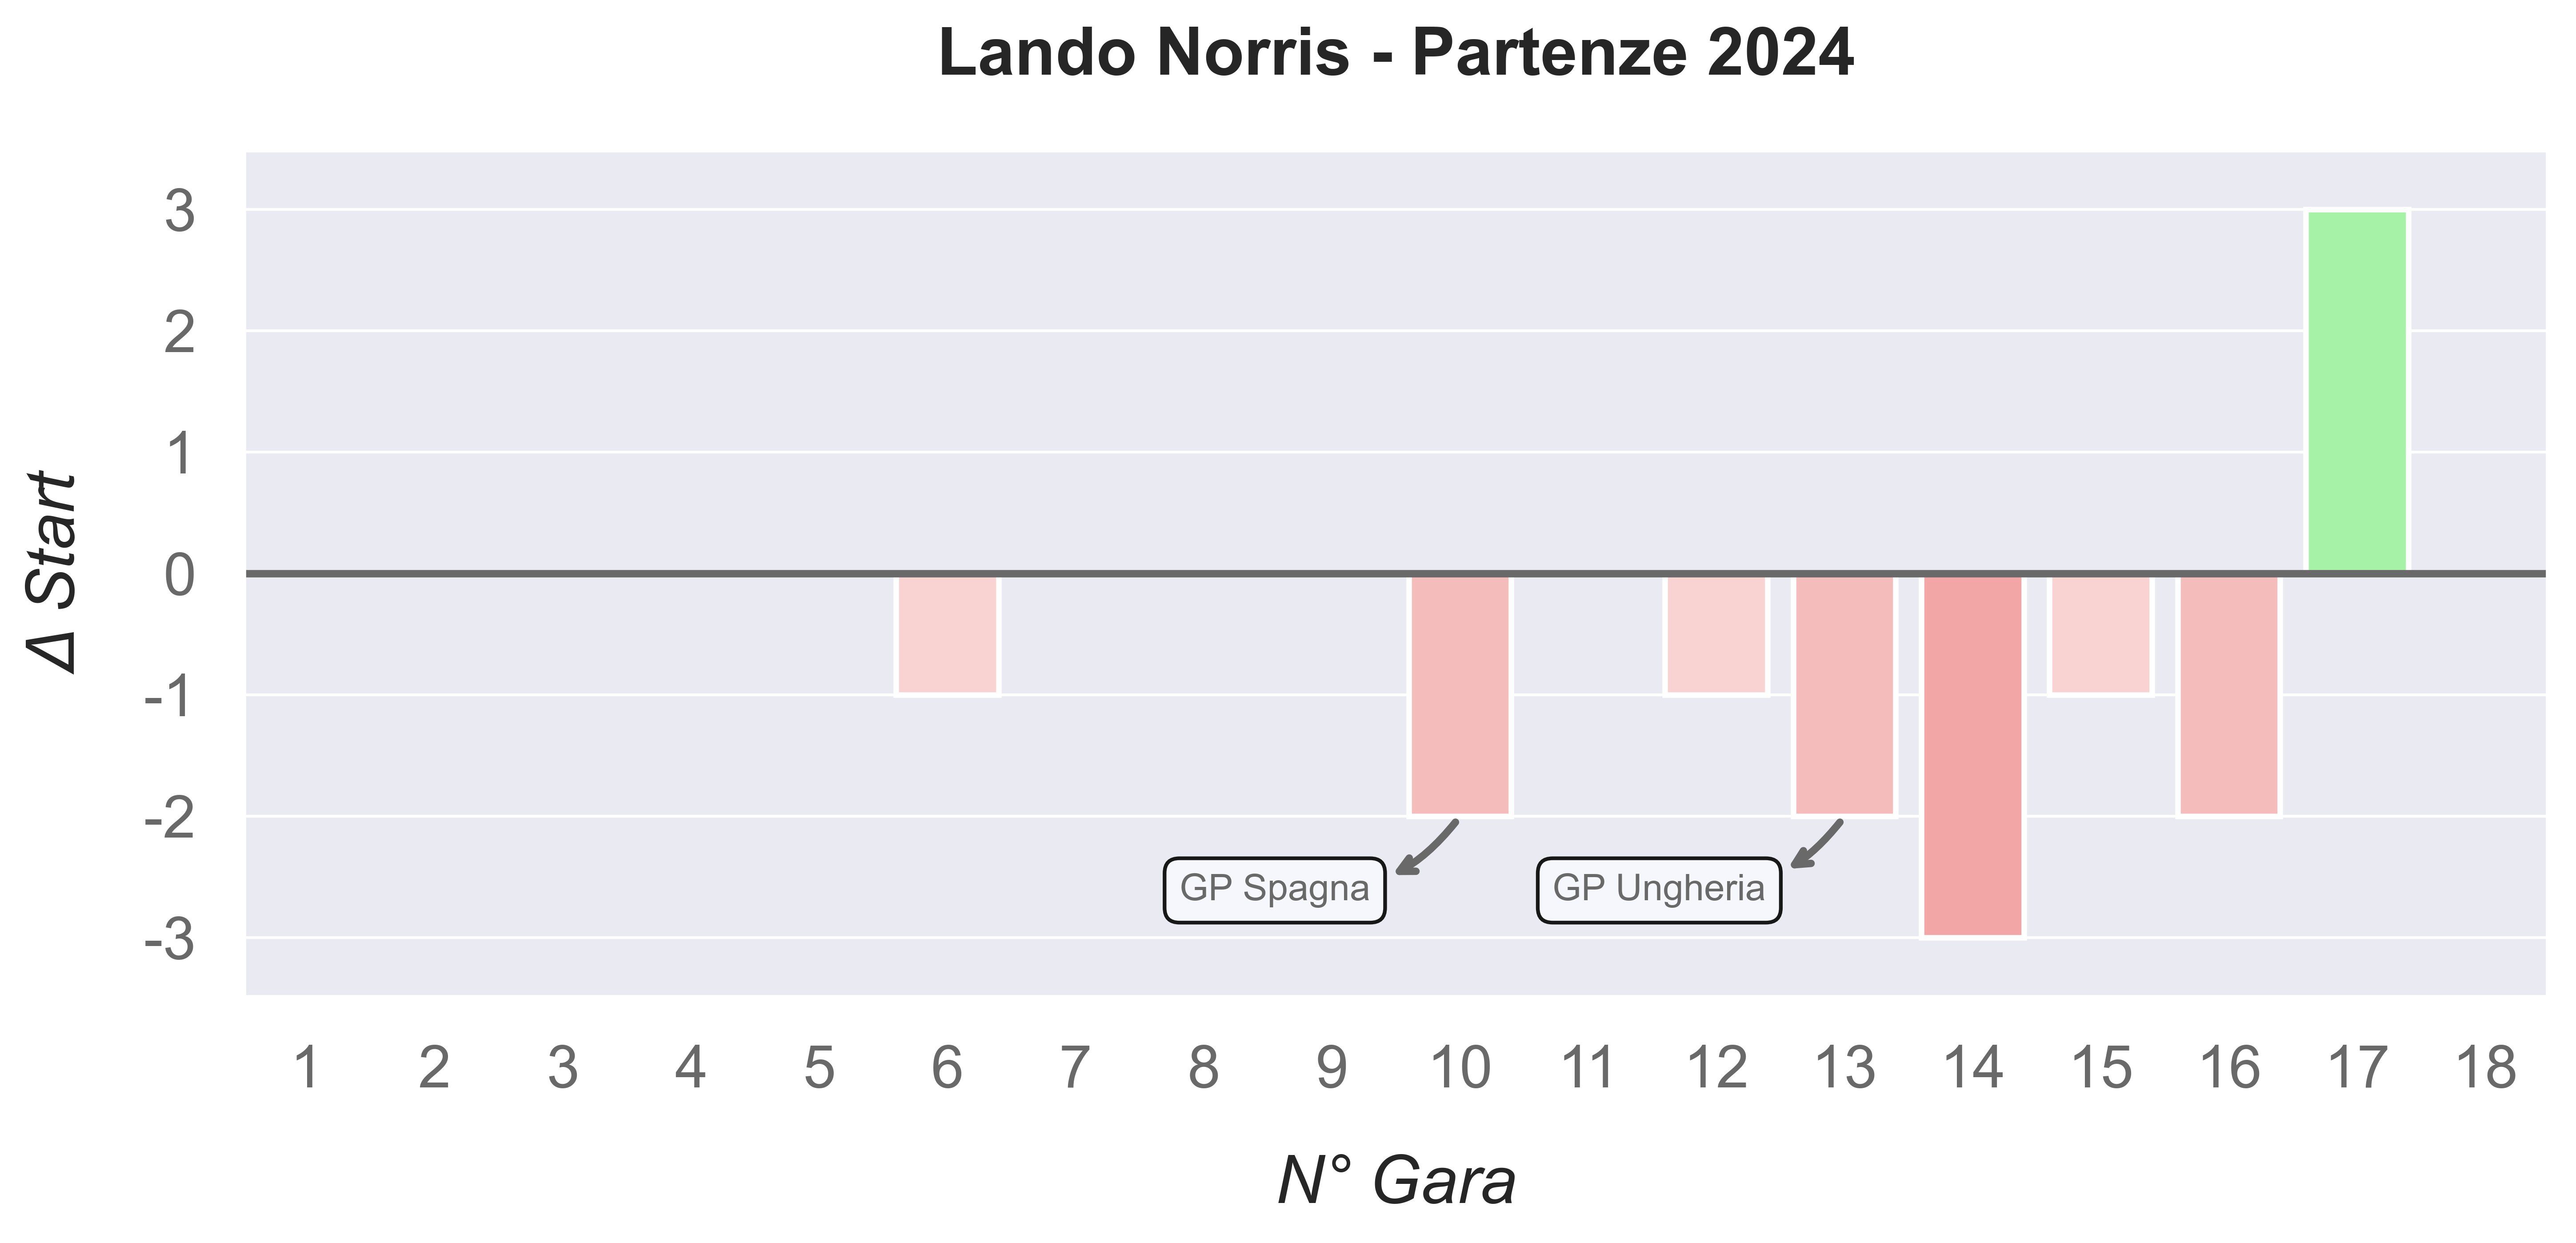

In [5]:
fig, ax = grafico_partenze_anno_pilota(df_partenze.copy(), 2024, "norris", (10, 5))
ann_1 = ax.annotate(
    "GP Spagna",
    xy=(10 - 1, -2),
    xytext=(-50, -20),
    textcoords="offset points",
    ha="center",
    va="center",
    fontsize=10,
    color="dimgray",
    arrowprops=dict(edgecolor="dimgray", arrowstyle="<-", lw=2.0, connectionstyle="arc3,rad=0.3"),
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", lw=1.0, facecolor="ghostwhite", alpha=0.9)
)  # Aggiungo la prima annotazione specifica al grafico del caso di studio
ann_2 = ax.annotate(
    "GP Ungheria",
    xy=(13 - 1, -2),
    xytext=(-50, -20),
    textcoords="offset points",
    ha="center",
    va="center",
    fontsize=10,
    color="dimgray",
    arrowprops=dict(edgecolor="dimgray", arrowstyle="<-", lw=2.0, connectionstyle="arc3,rad=0.3"),
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", lw=1.0, facecolor="ghostwhite", alpha=0.9)
)  # Aggiungo la seconda annotazione specifica al grafico del caso di studio

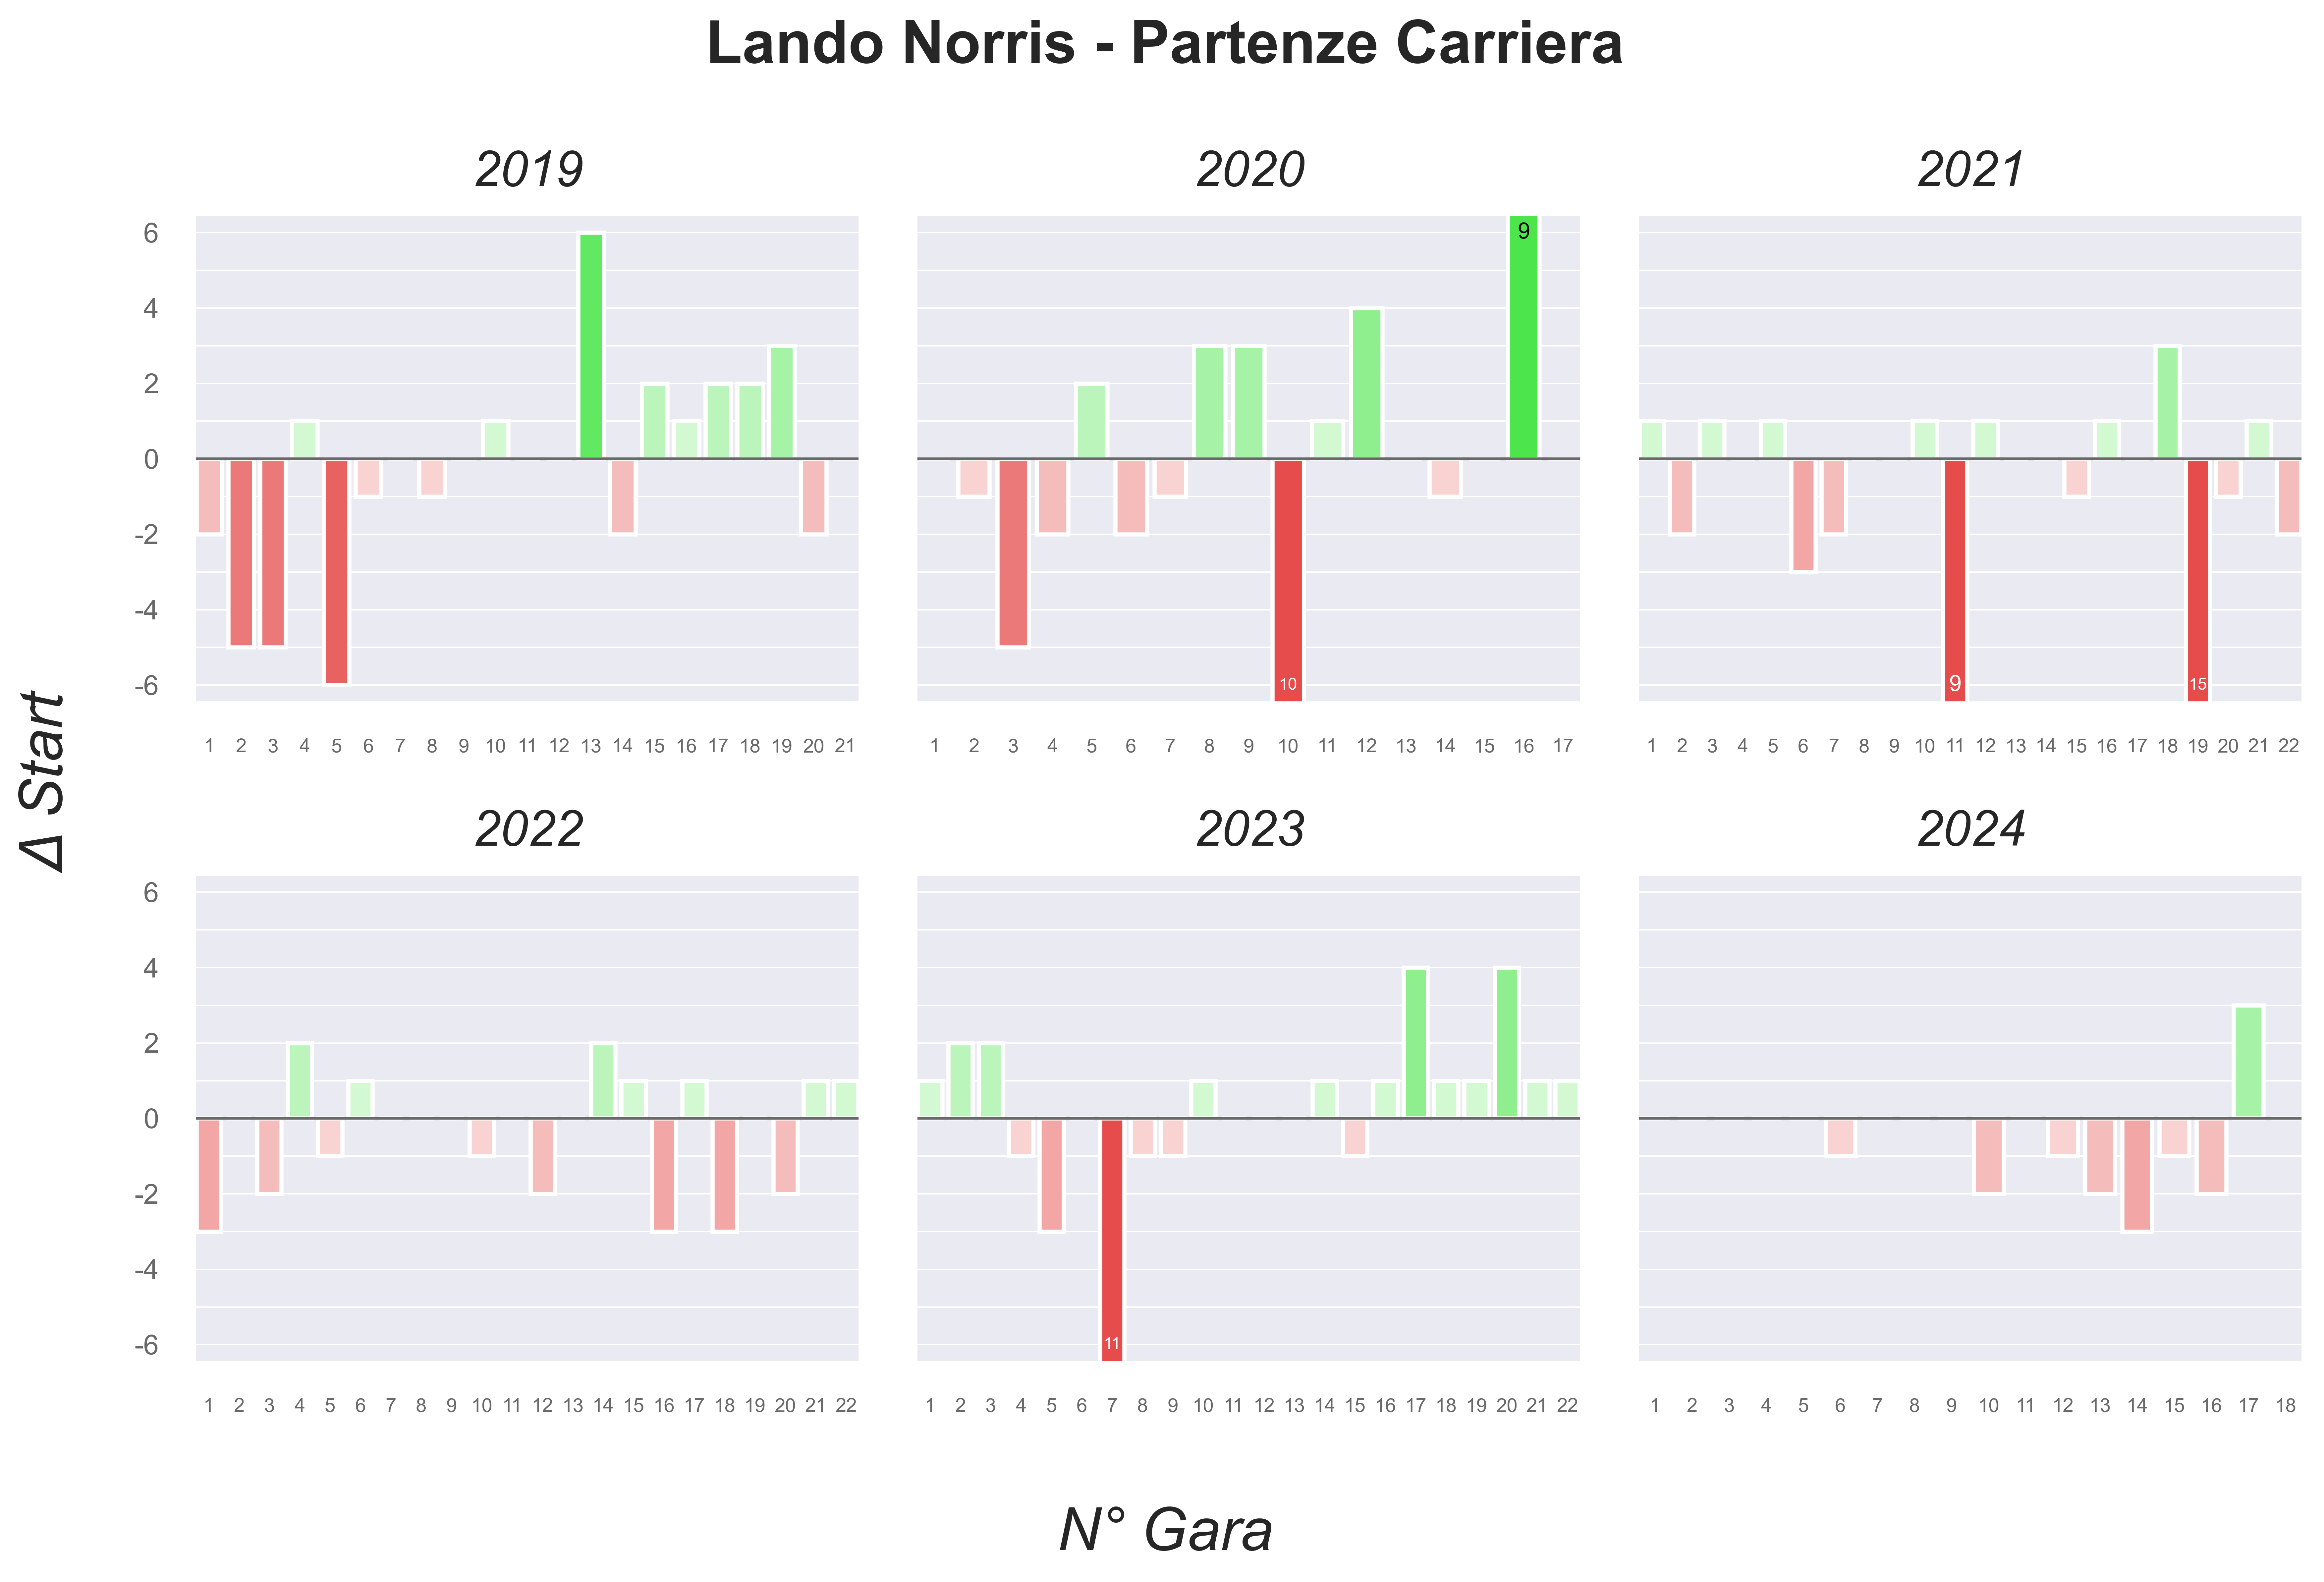

In [6]:
fig, ax = grafico_partenze_pilota(df_partenze.copy(), "norris", (12, 8))

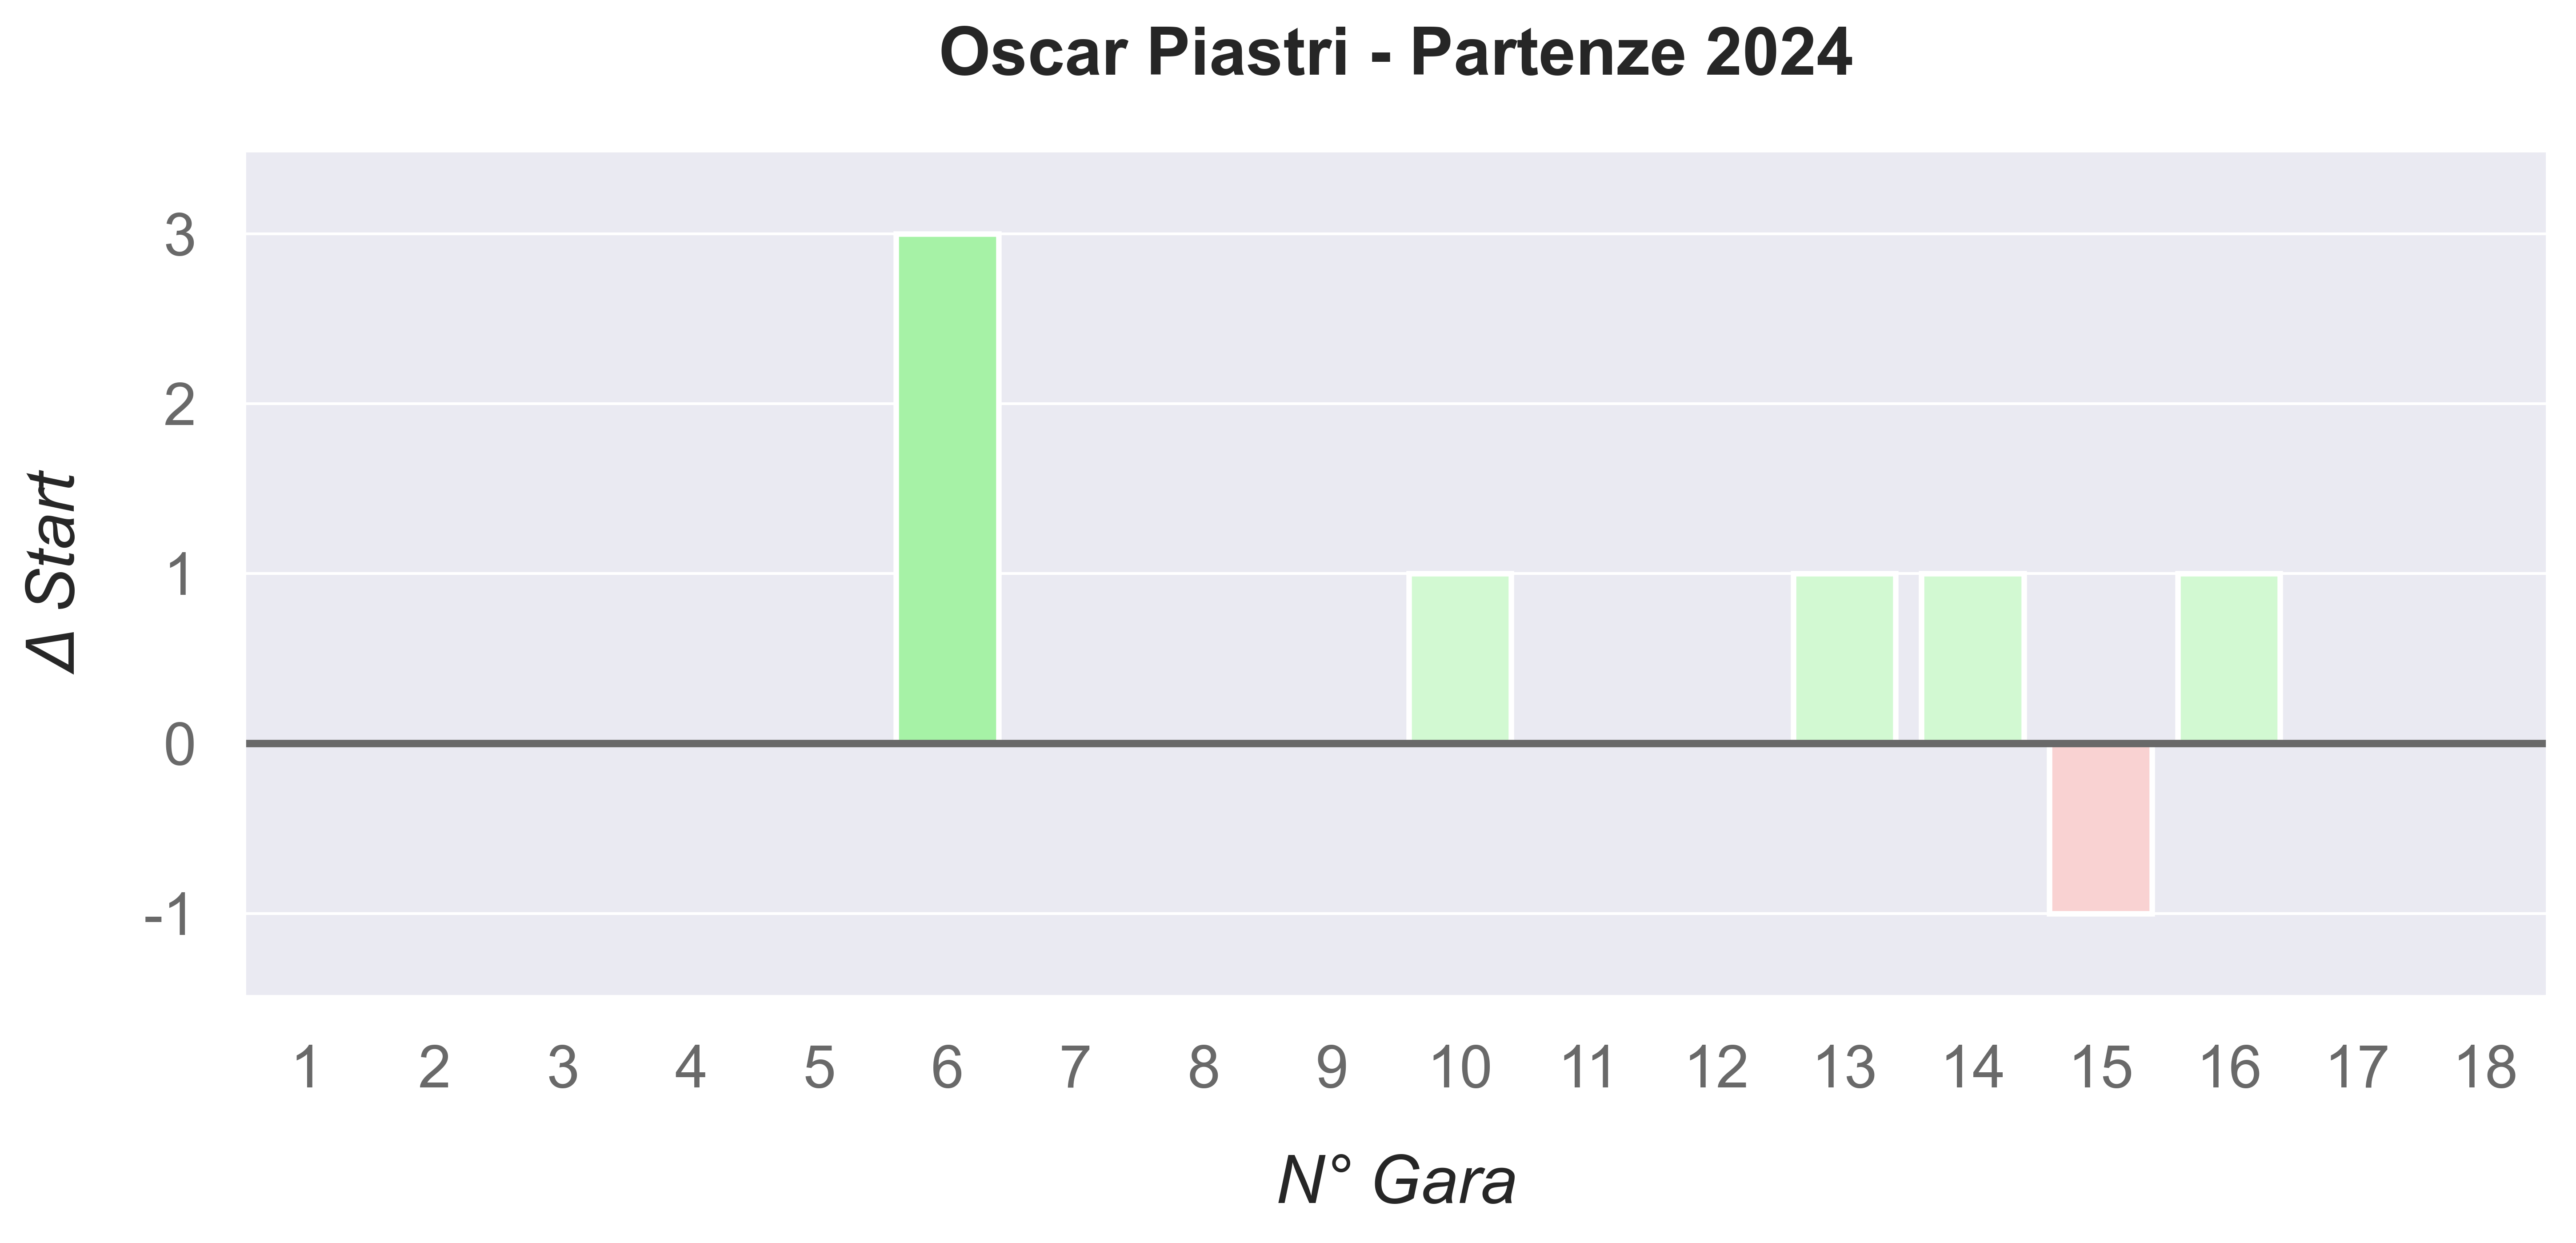

In [7]:
fig, ax = grafico_partenze_anno_pilota(df_partenze.copy(), 2024, "piastri", (10, 5))

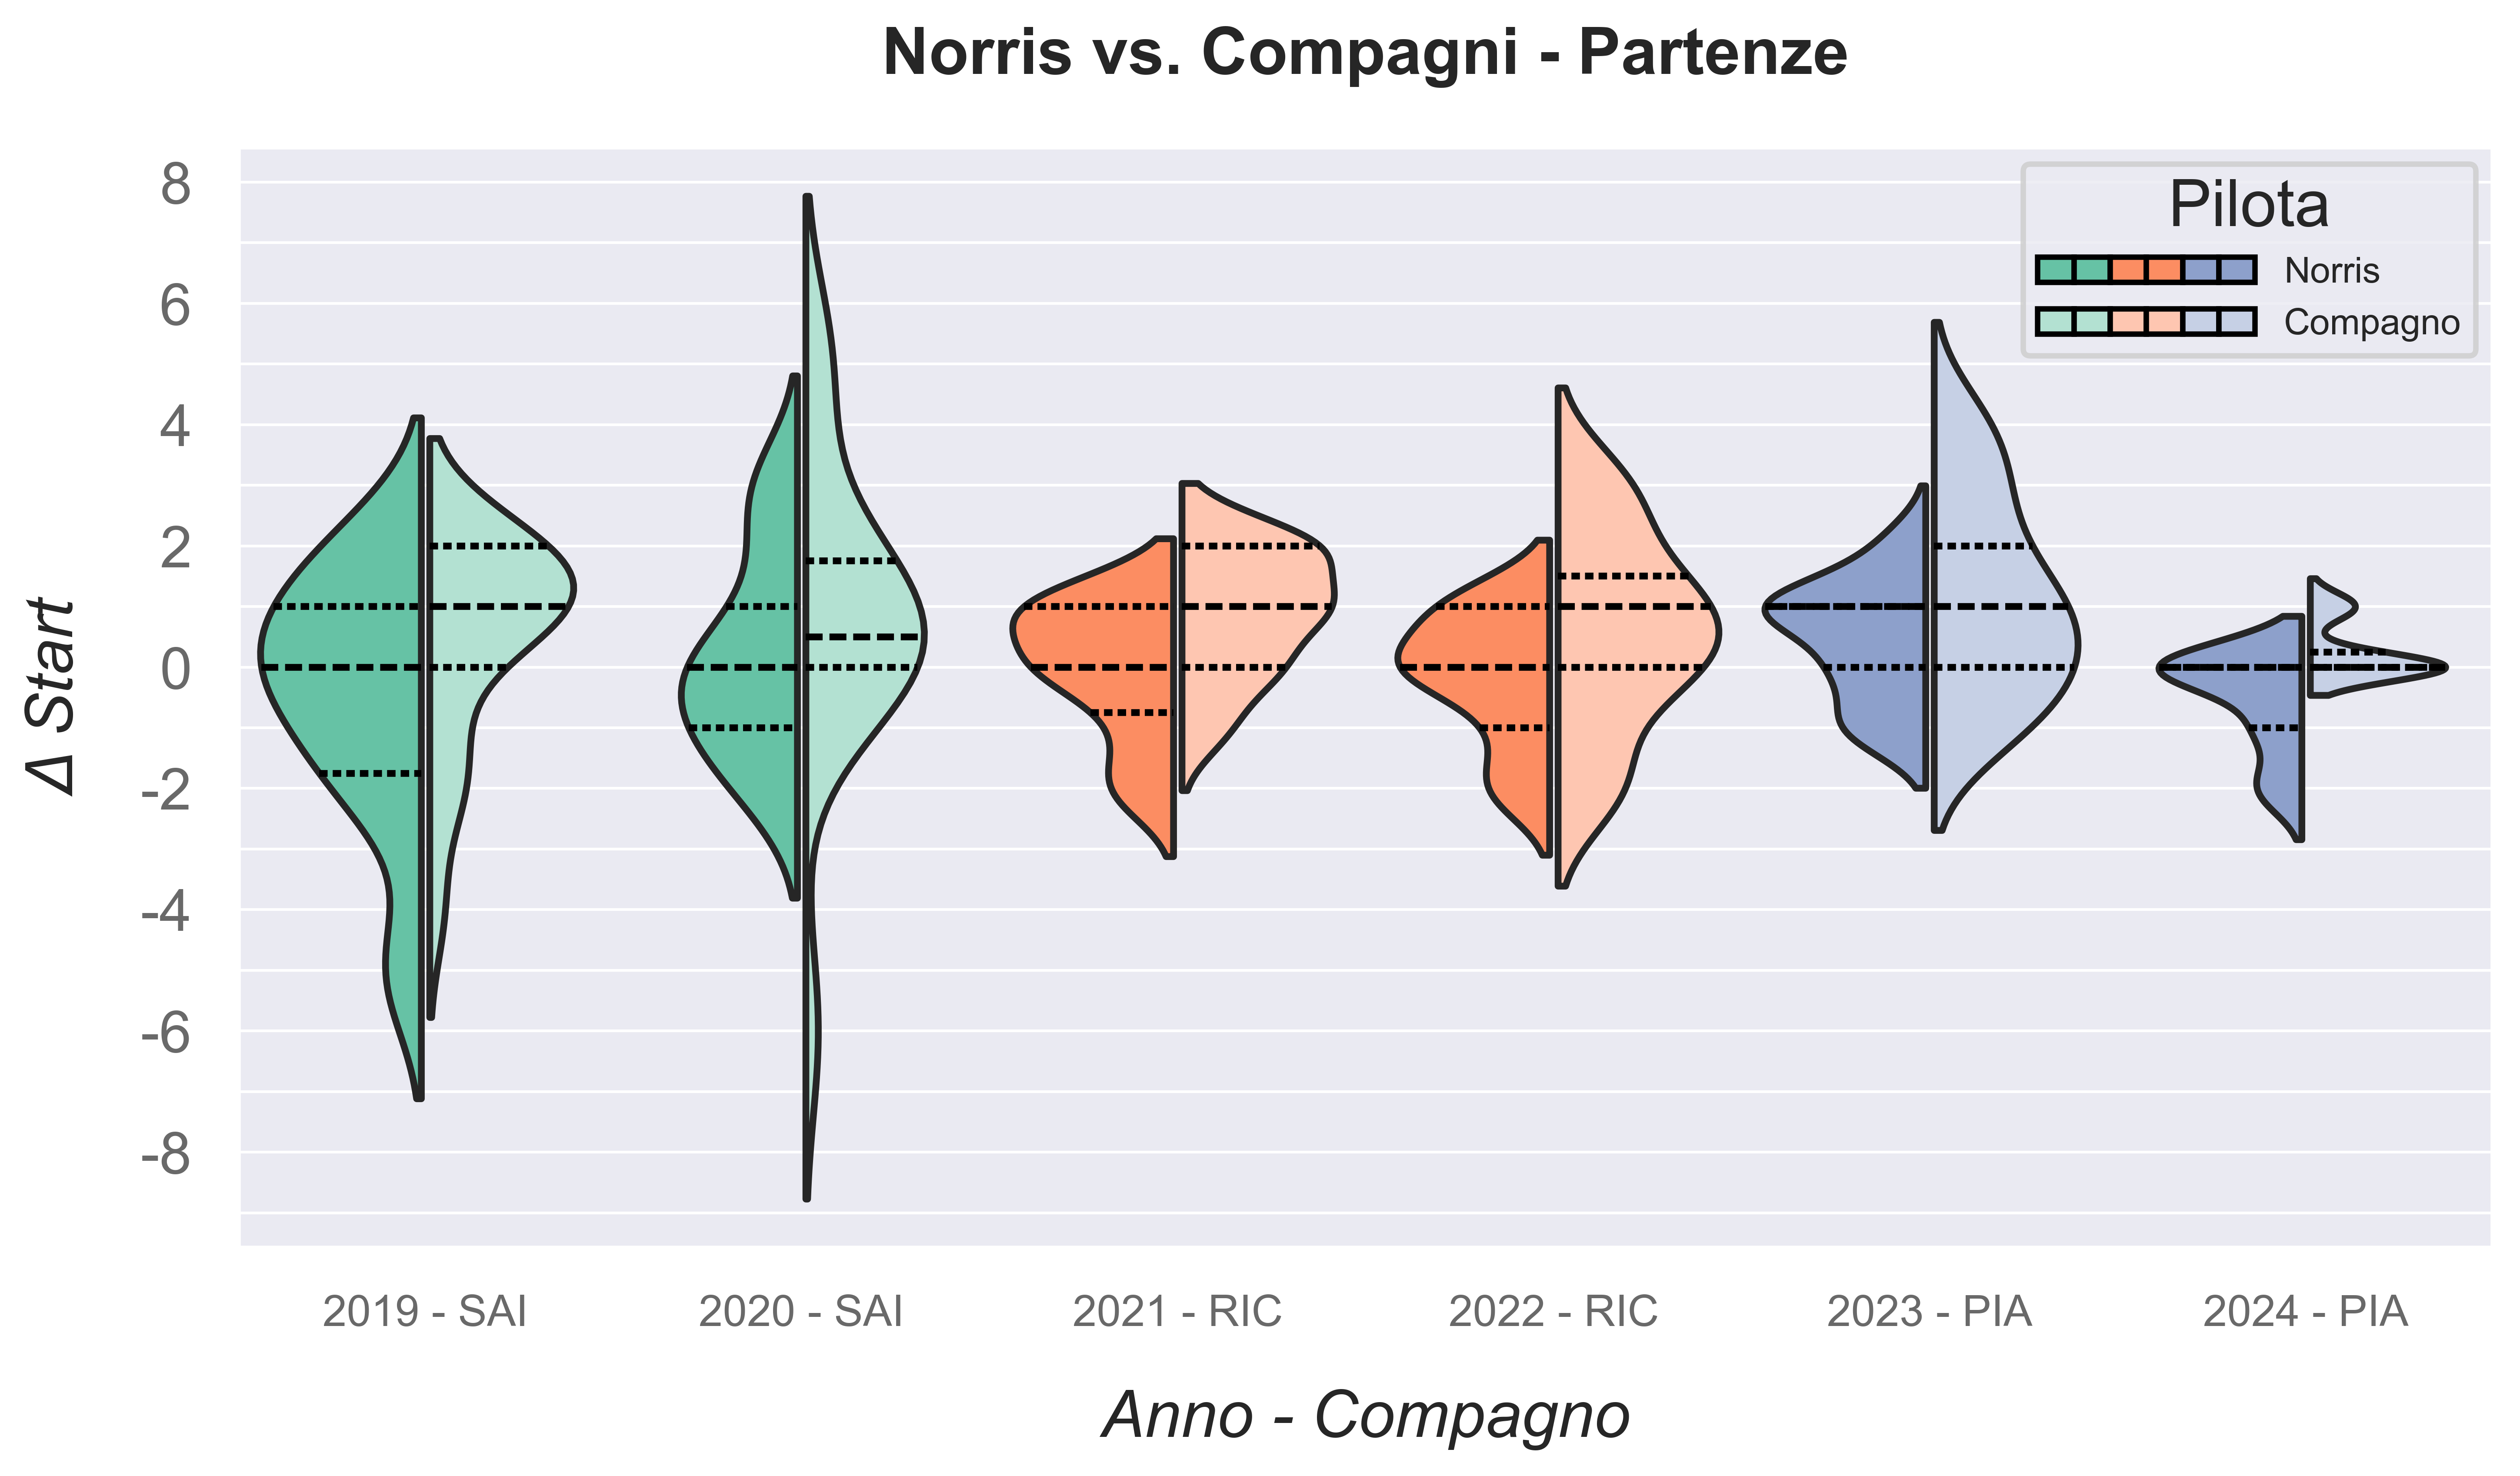

In [8]:
fig, ax = grafico_partenze_pilota_compagni(df_partenze.copy(), "norris", 10, 90, (10, 6))

*Δ Start*: filtro percentile **10%** - **90%** attivato

In [9]:
display(tabella_partenze_pilota_compagni(df_partenze.copy(), "norris").iloc[:, [0] + list(range(1, 5, 1))])
display(tabella_partenze_pilota_compagni(df_partenze.copy(), "norris").iloc[:, [0] + list(range(-1, -5, -1))])

Compagno Squadra  Punti Compagno  % Comp.  % NOR  Punti NOR
Anno                                                             
2019      Carlos Sainz            96.0     66.2   33.8       49.0
2020      Carlos Sainz           105.0     52.0   48.0       97.0
2021  Daniel Ricciardo           114.0     41.6   58.4      160.0
2022  Daniel Ricciardo            34.0     22.7   77.3      116.0
2023     Oscar Piastri            82.0     30.8   69.2      184.0
2024     Oscar Piastri           225.0     45.5   54.5      270.0

Compagno Squadra  Griglia μ Compagno  Δ Start μ Compagno  Δ Start μ NOR  \
Anno                                                                            
2019      Carlos Sainz                10.3               -0.14          -0.29   
2020      Carlos Sainz                 8.4               -0.53           0.00   
2021  Daniel Ricciardo                 9.7                0.27          -1.14   
2022  Daniel Ricciardo                11.4               -0.32          -0.36   
2023     Oscar Piastri                 9.6                0.00           0.09   
2024     Oscar Piastri                 4.8                0.33          -0.50   

      Griglia μ NOR  
Anno                 
2019            9.3  
2020            8.8  
2021            6.9  
2022            8.0  
2023            8.0  
2024            3.7

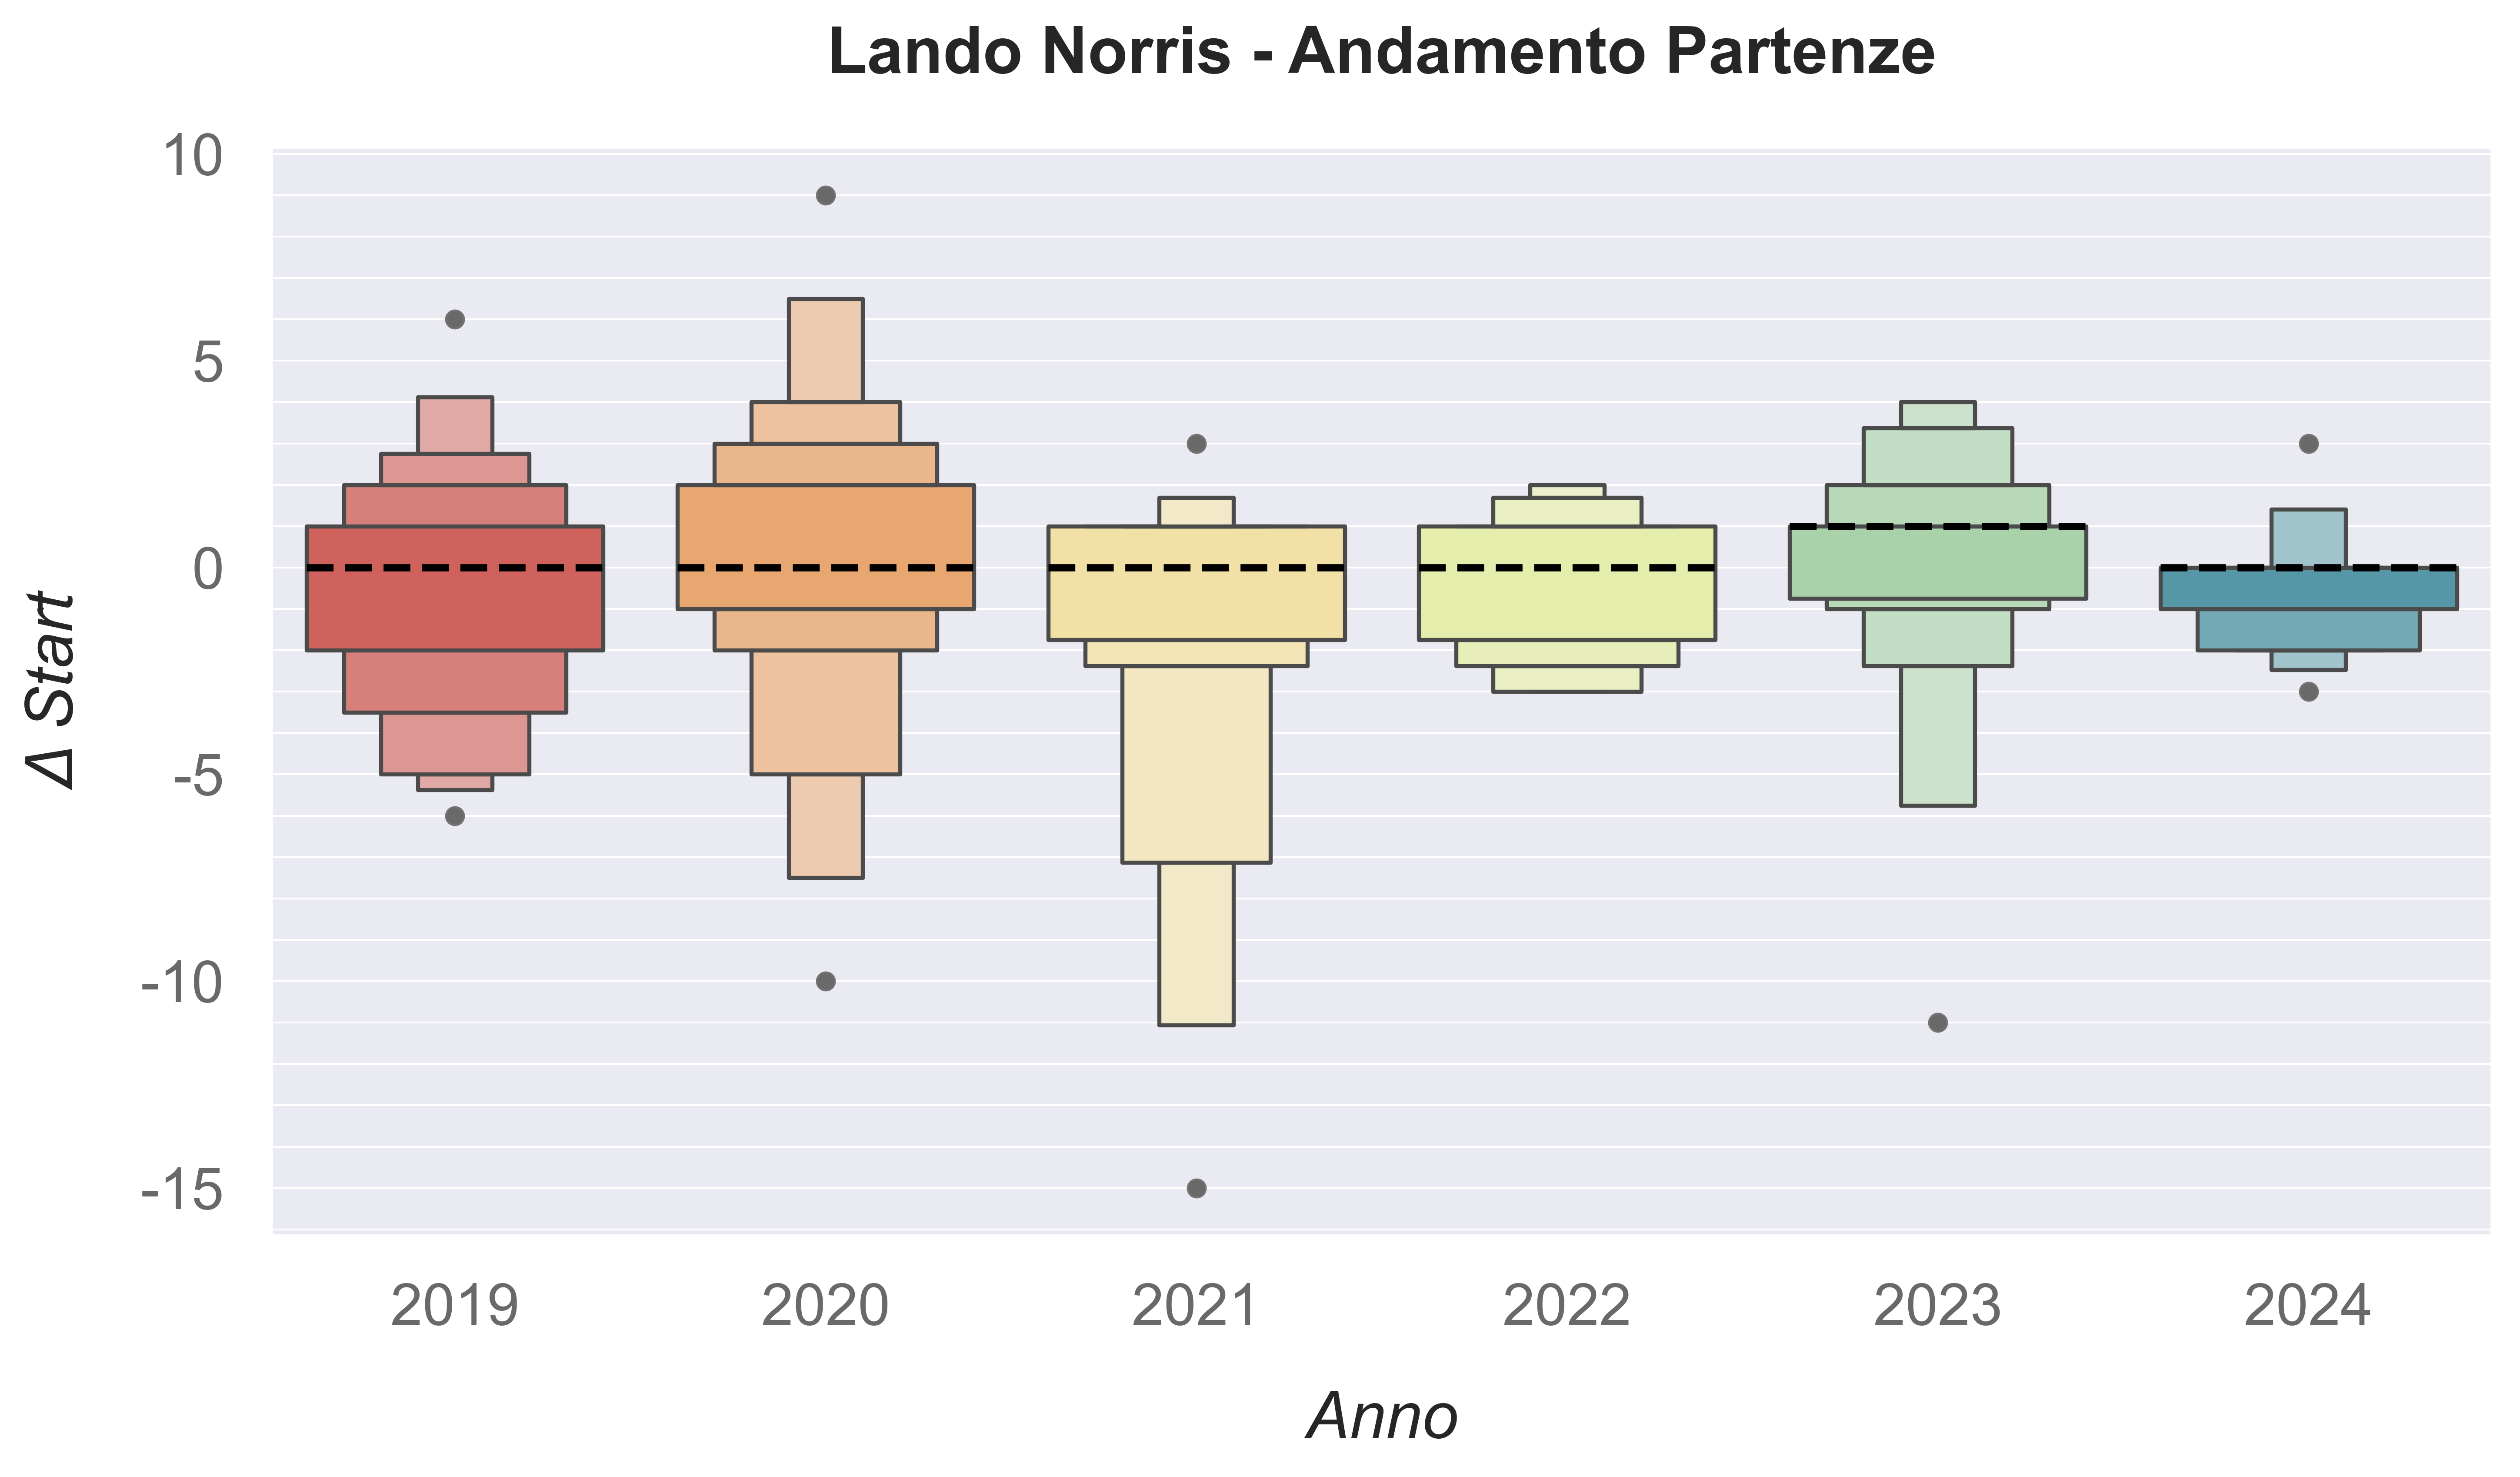

In [10]:
fig, ax = grafico_andamento_partenze_pilota(df_partenze.copy(), "norris", (10, 6))

### Tabella riassuntiva andamento partenze Norris:

<br>

In [11]:
display(tabella_andamento_partenze_pilota(df_partenze.copy(), "norris"))

P. Partenza μ  Δ Start μ  P. Arrivo μ
Anno                                       
2019           9.33      -0.29        11.33
2020           8.76       0.00         8.29
2021           6.86      -1.14         7.00
2022           8.05      -0.36         8.77
2023           7.95       0.09         8.00
2024           3.67      -0.50         4.11

## **Domanda**:

<br>
<br>

### Qual è il fattore principale che ha influenzato negativamente le partenze di *Lando Norris* in questa stagione?

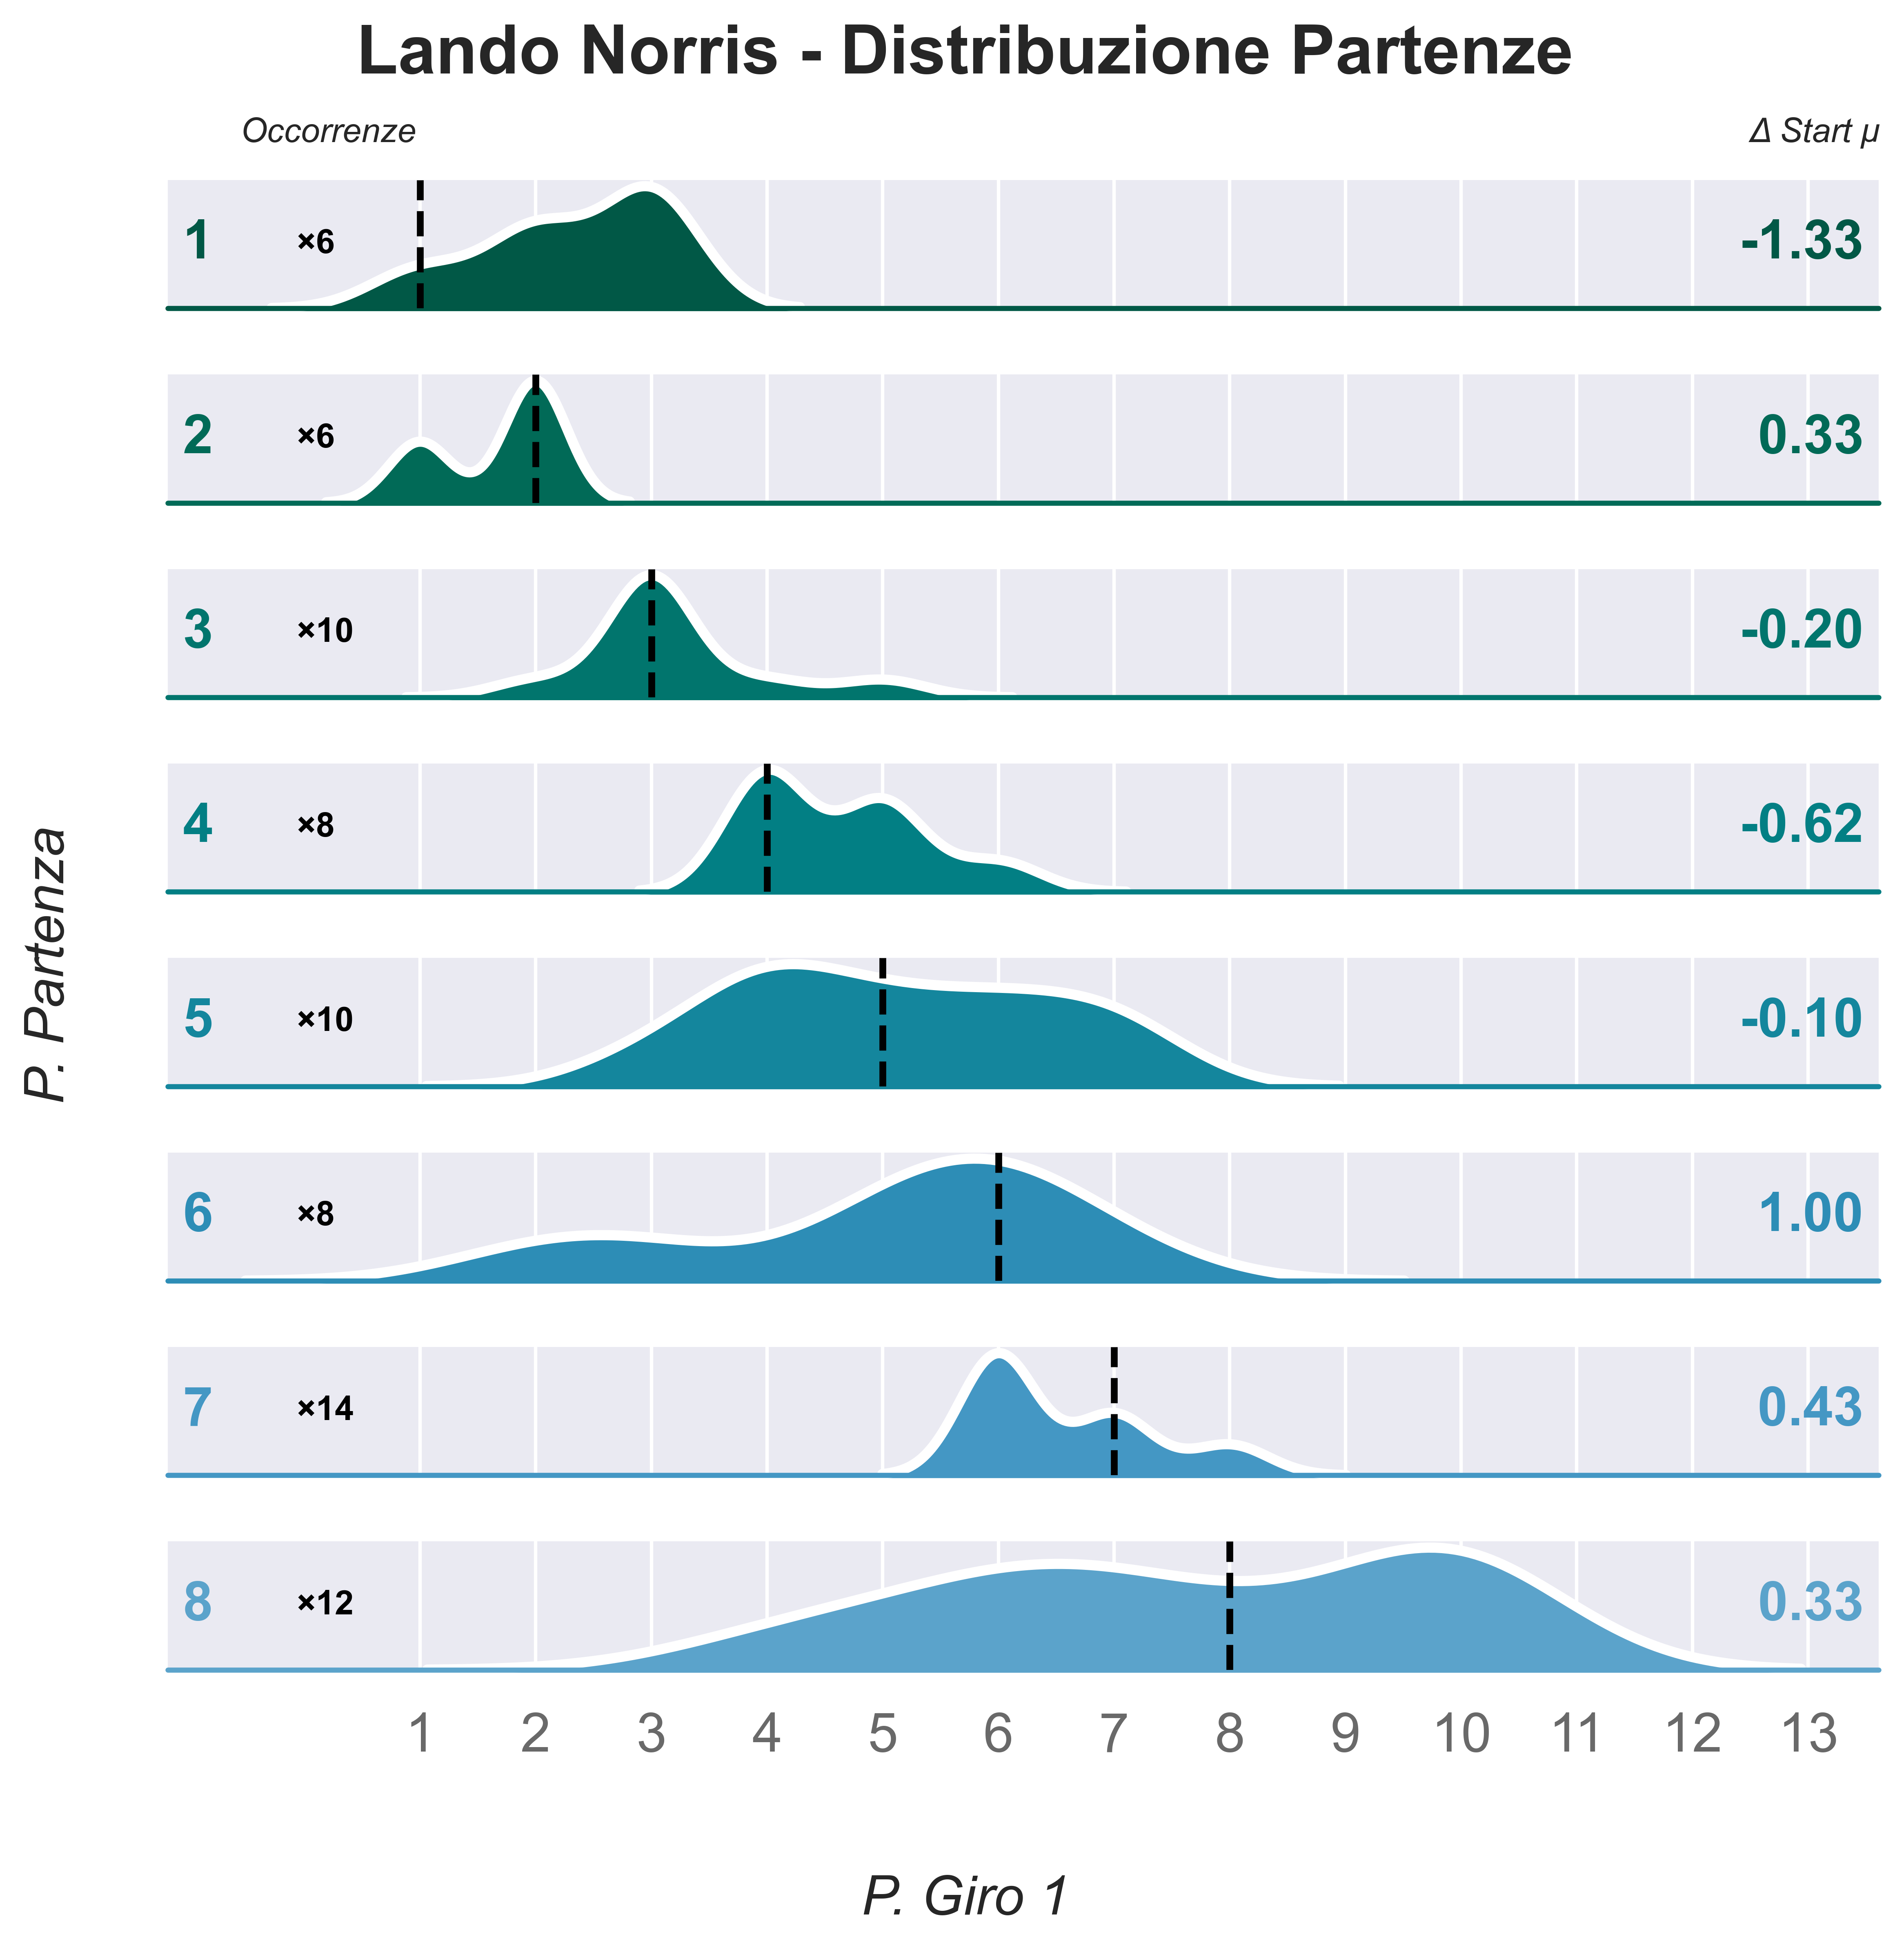

In [12]:
fig, ax = grafico_distribuzione_partenze_pilota(df_partenze.copy(), "norris", 1, 8, 0, 90, (8, 1))

*P. Giro 1*: filtro percentile **0%** - **90%** attivato

# Analisi - Seconda Parte

## **Domanda**:

<br>
<br>

### In quale posizione mi troverò a fine 1° giro? 

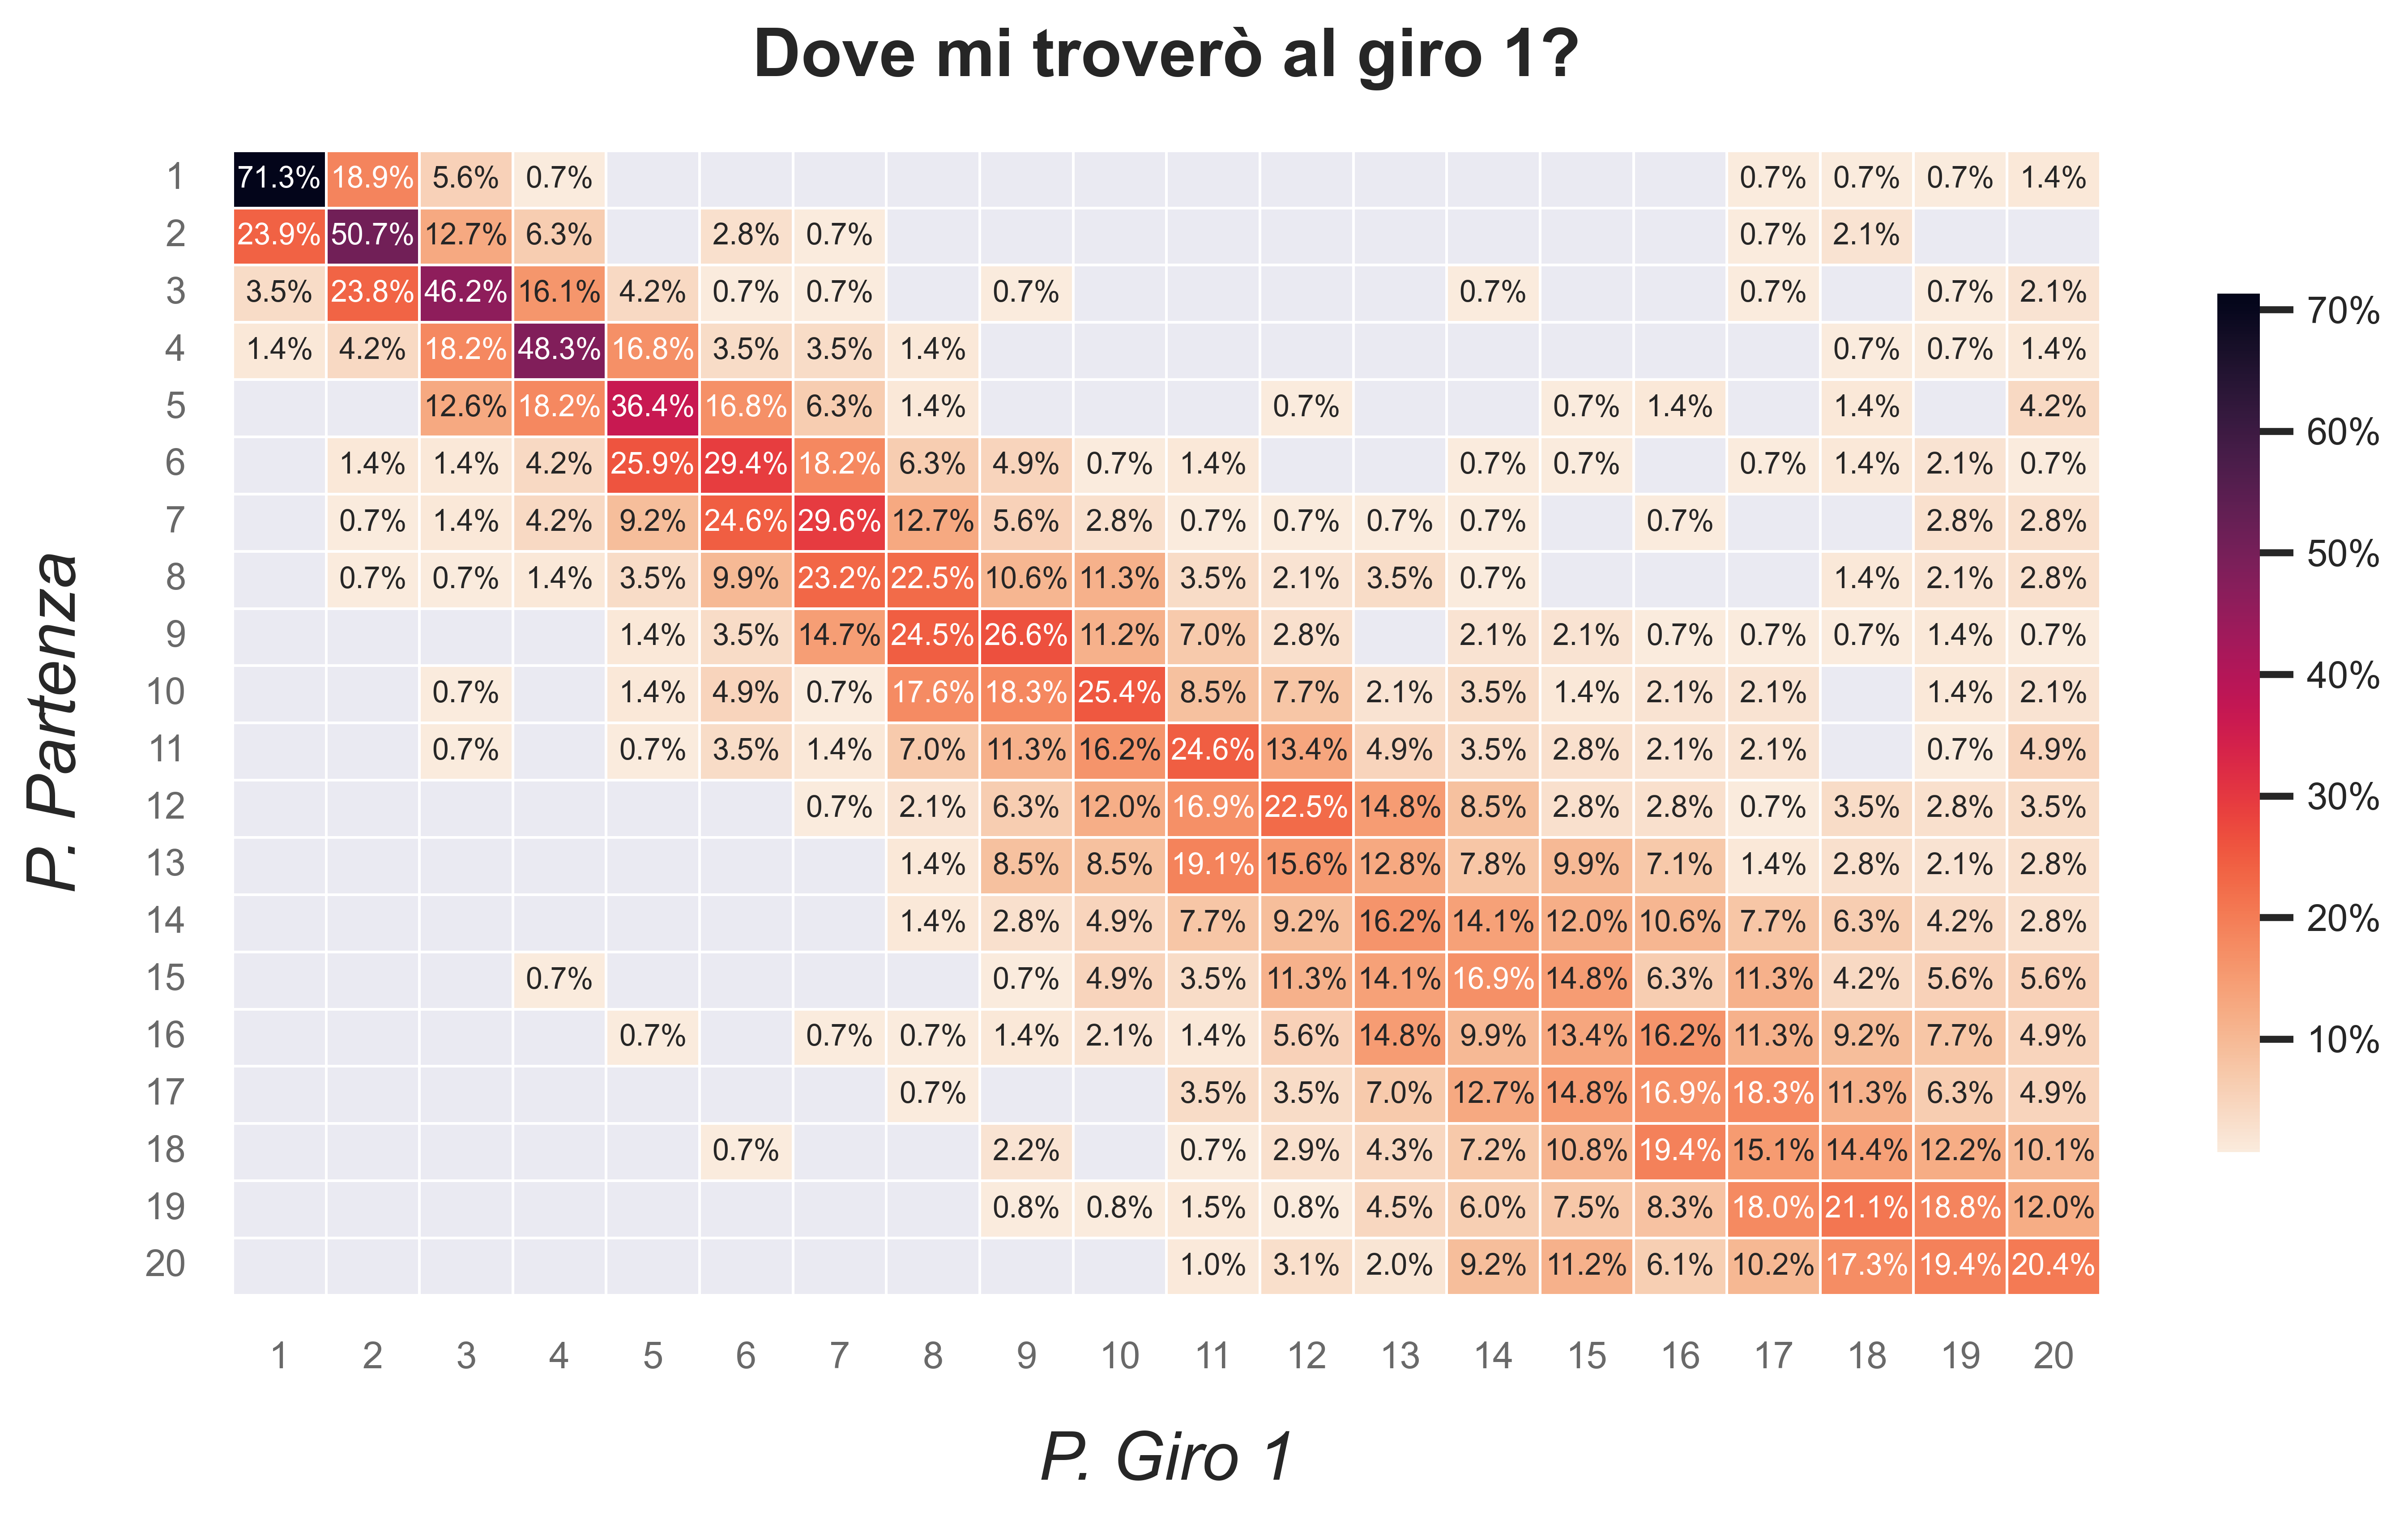

In [13]:
fig, ax = grafico_heatmap_posizioni(df_partenze.copy(), "Dove mi troverò al giro 1?",
                                    'GridPosition', "P. Partenza", 'Lap1Position', "P. Giro 1", "rocket_r", (10, 6))

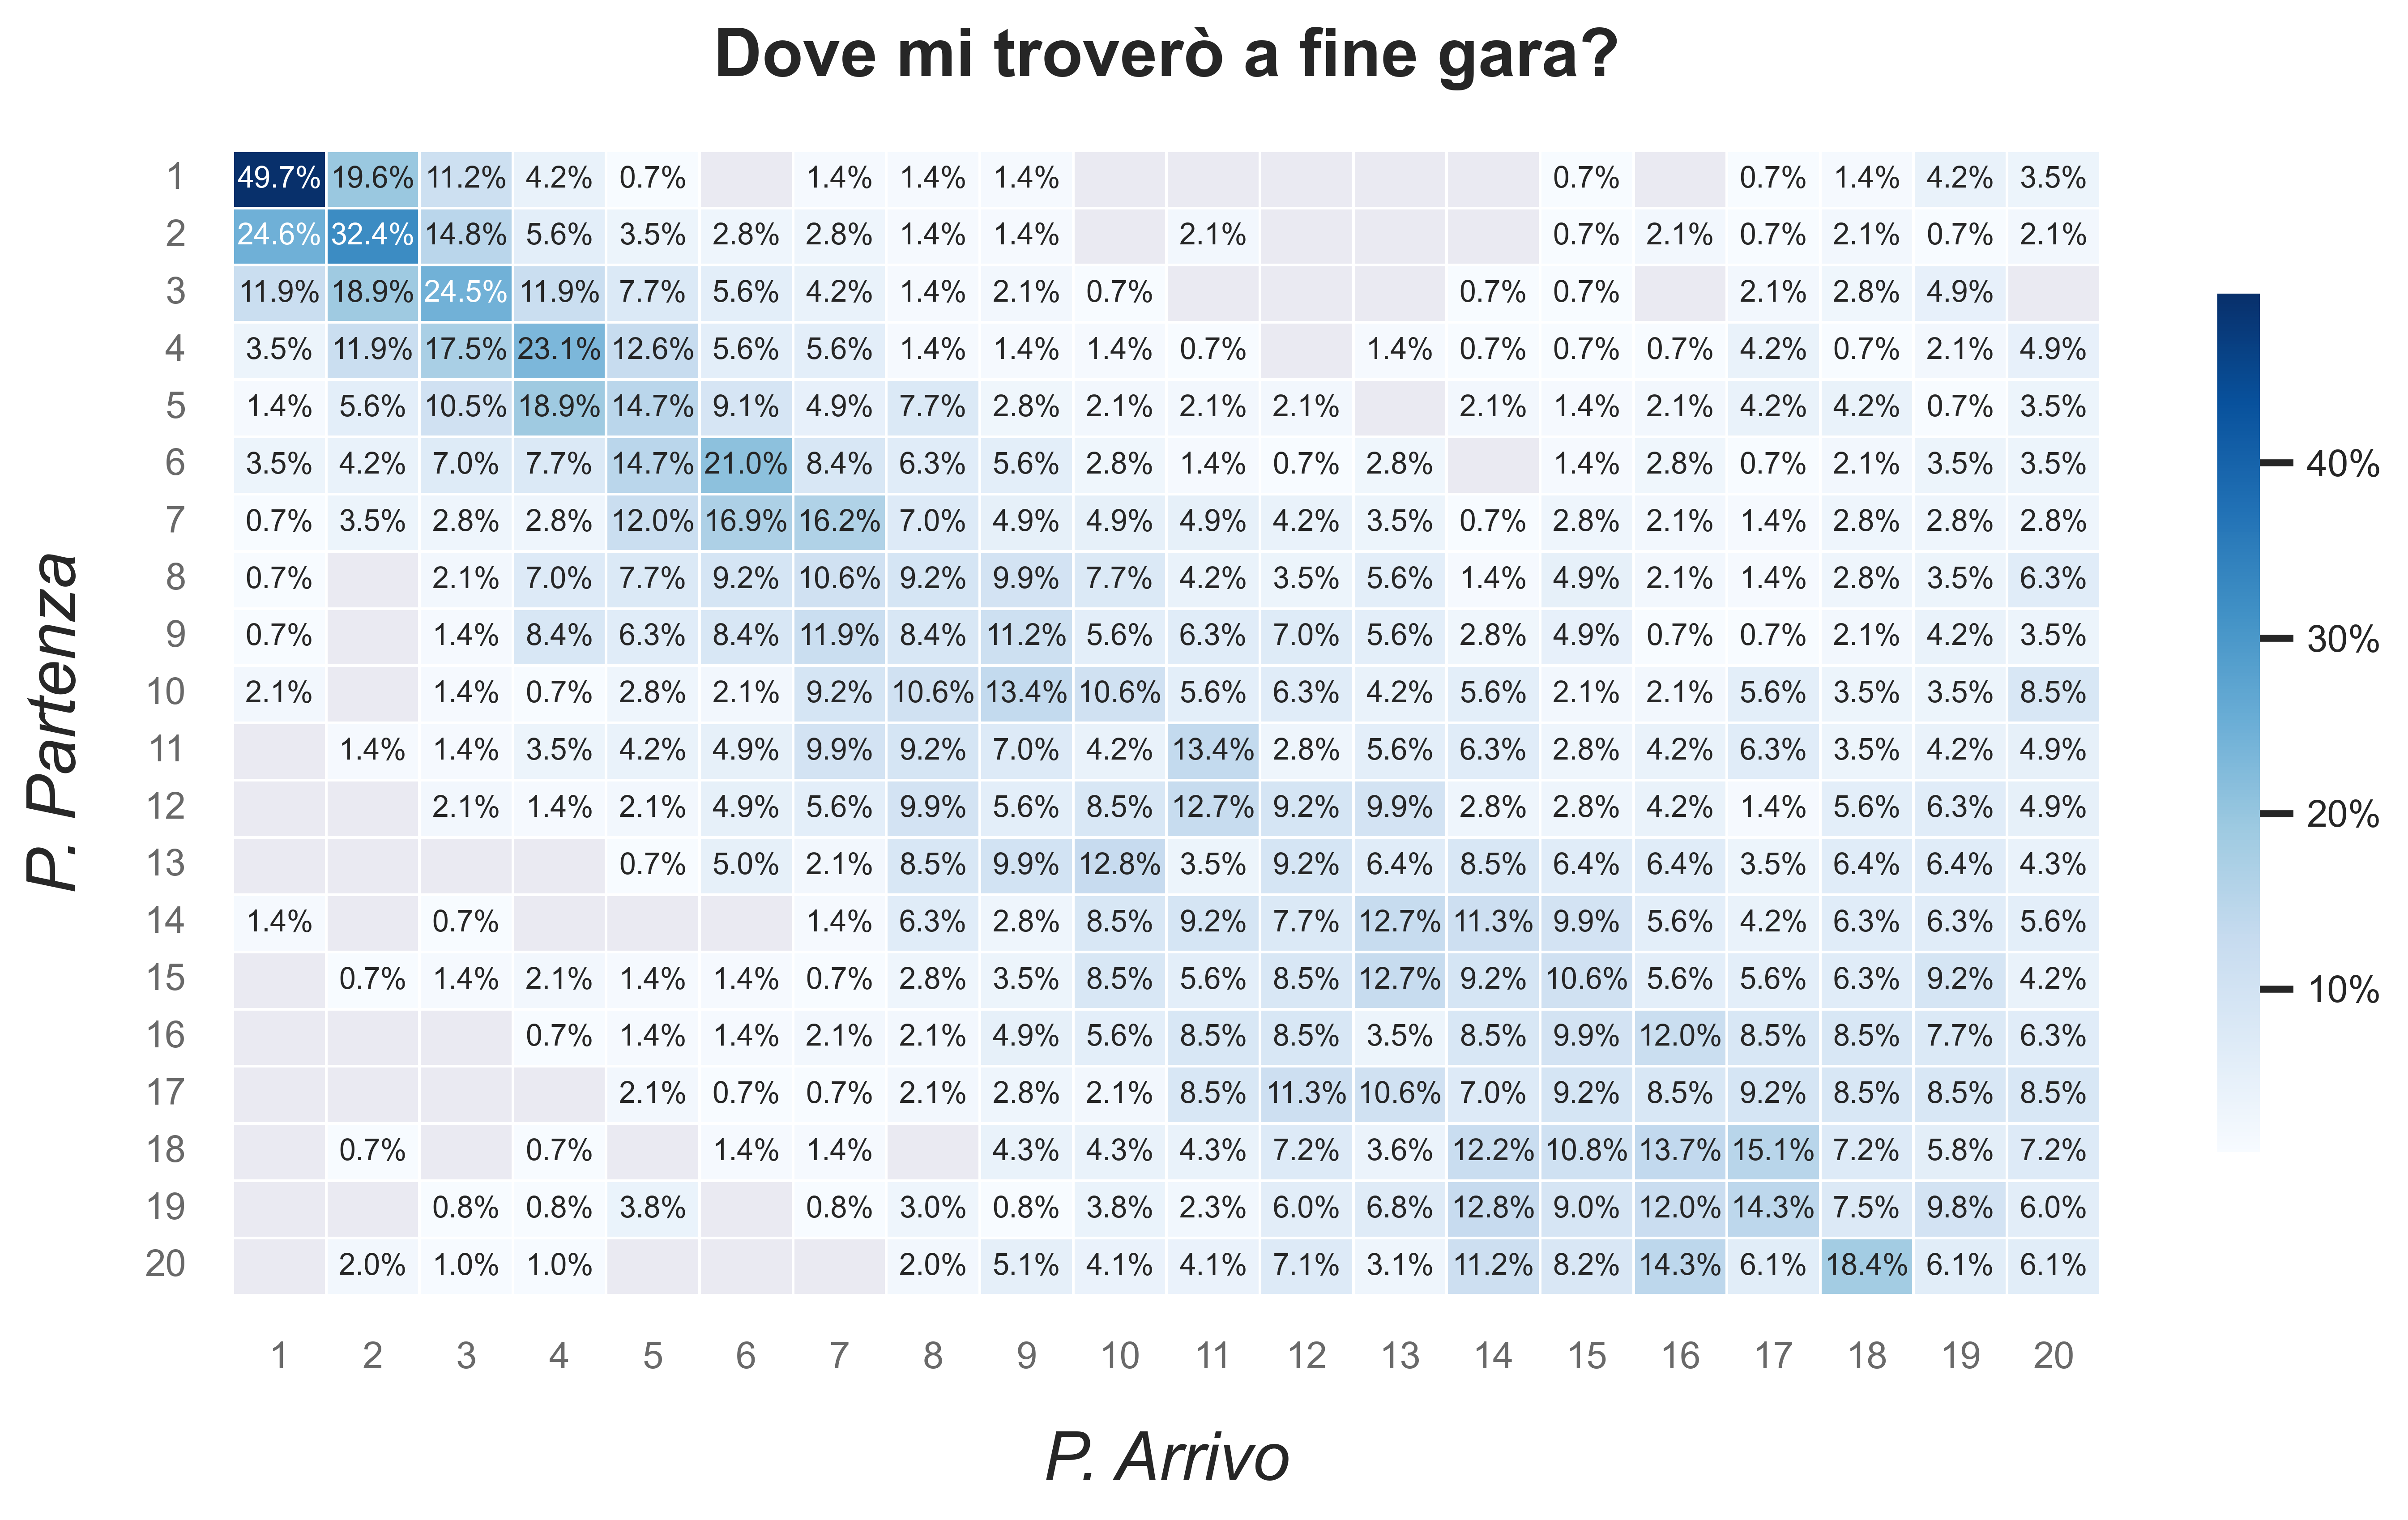

In [14]:
fig, ax = grafico_heatmap_posizioni(df_partenze.copy(), "Dove mi troverò a fine gara?",
                                    'GridPosition', "P. Partenza", 'ClassifiedPosition', "P. Arrivo", "Blues", (10, 6))

## **Scenario**:

<br>

- In posizione di partenza *X* c'è il pilota **A** e dietro di lui parte il pilota **B** con gomme più fresche (**B** ha gomme *nuove*, mentre **A** ha gomme *usate/scrubbed*).
- In posizione di partenza *Y* c'è il pilota **C** e dietro di lui parte il pilota **D** con gomme più morbide (**D** ha gomme di almeno un *compound* più morbido rispetto a quello di **C**).

<br>
<br>

In quale scenario è più probabile che il pilota che parte dietro superi in partenza quello che lo precede?

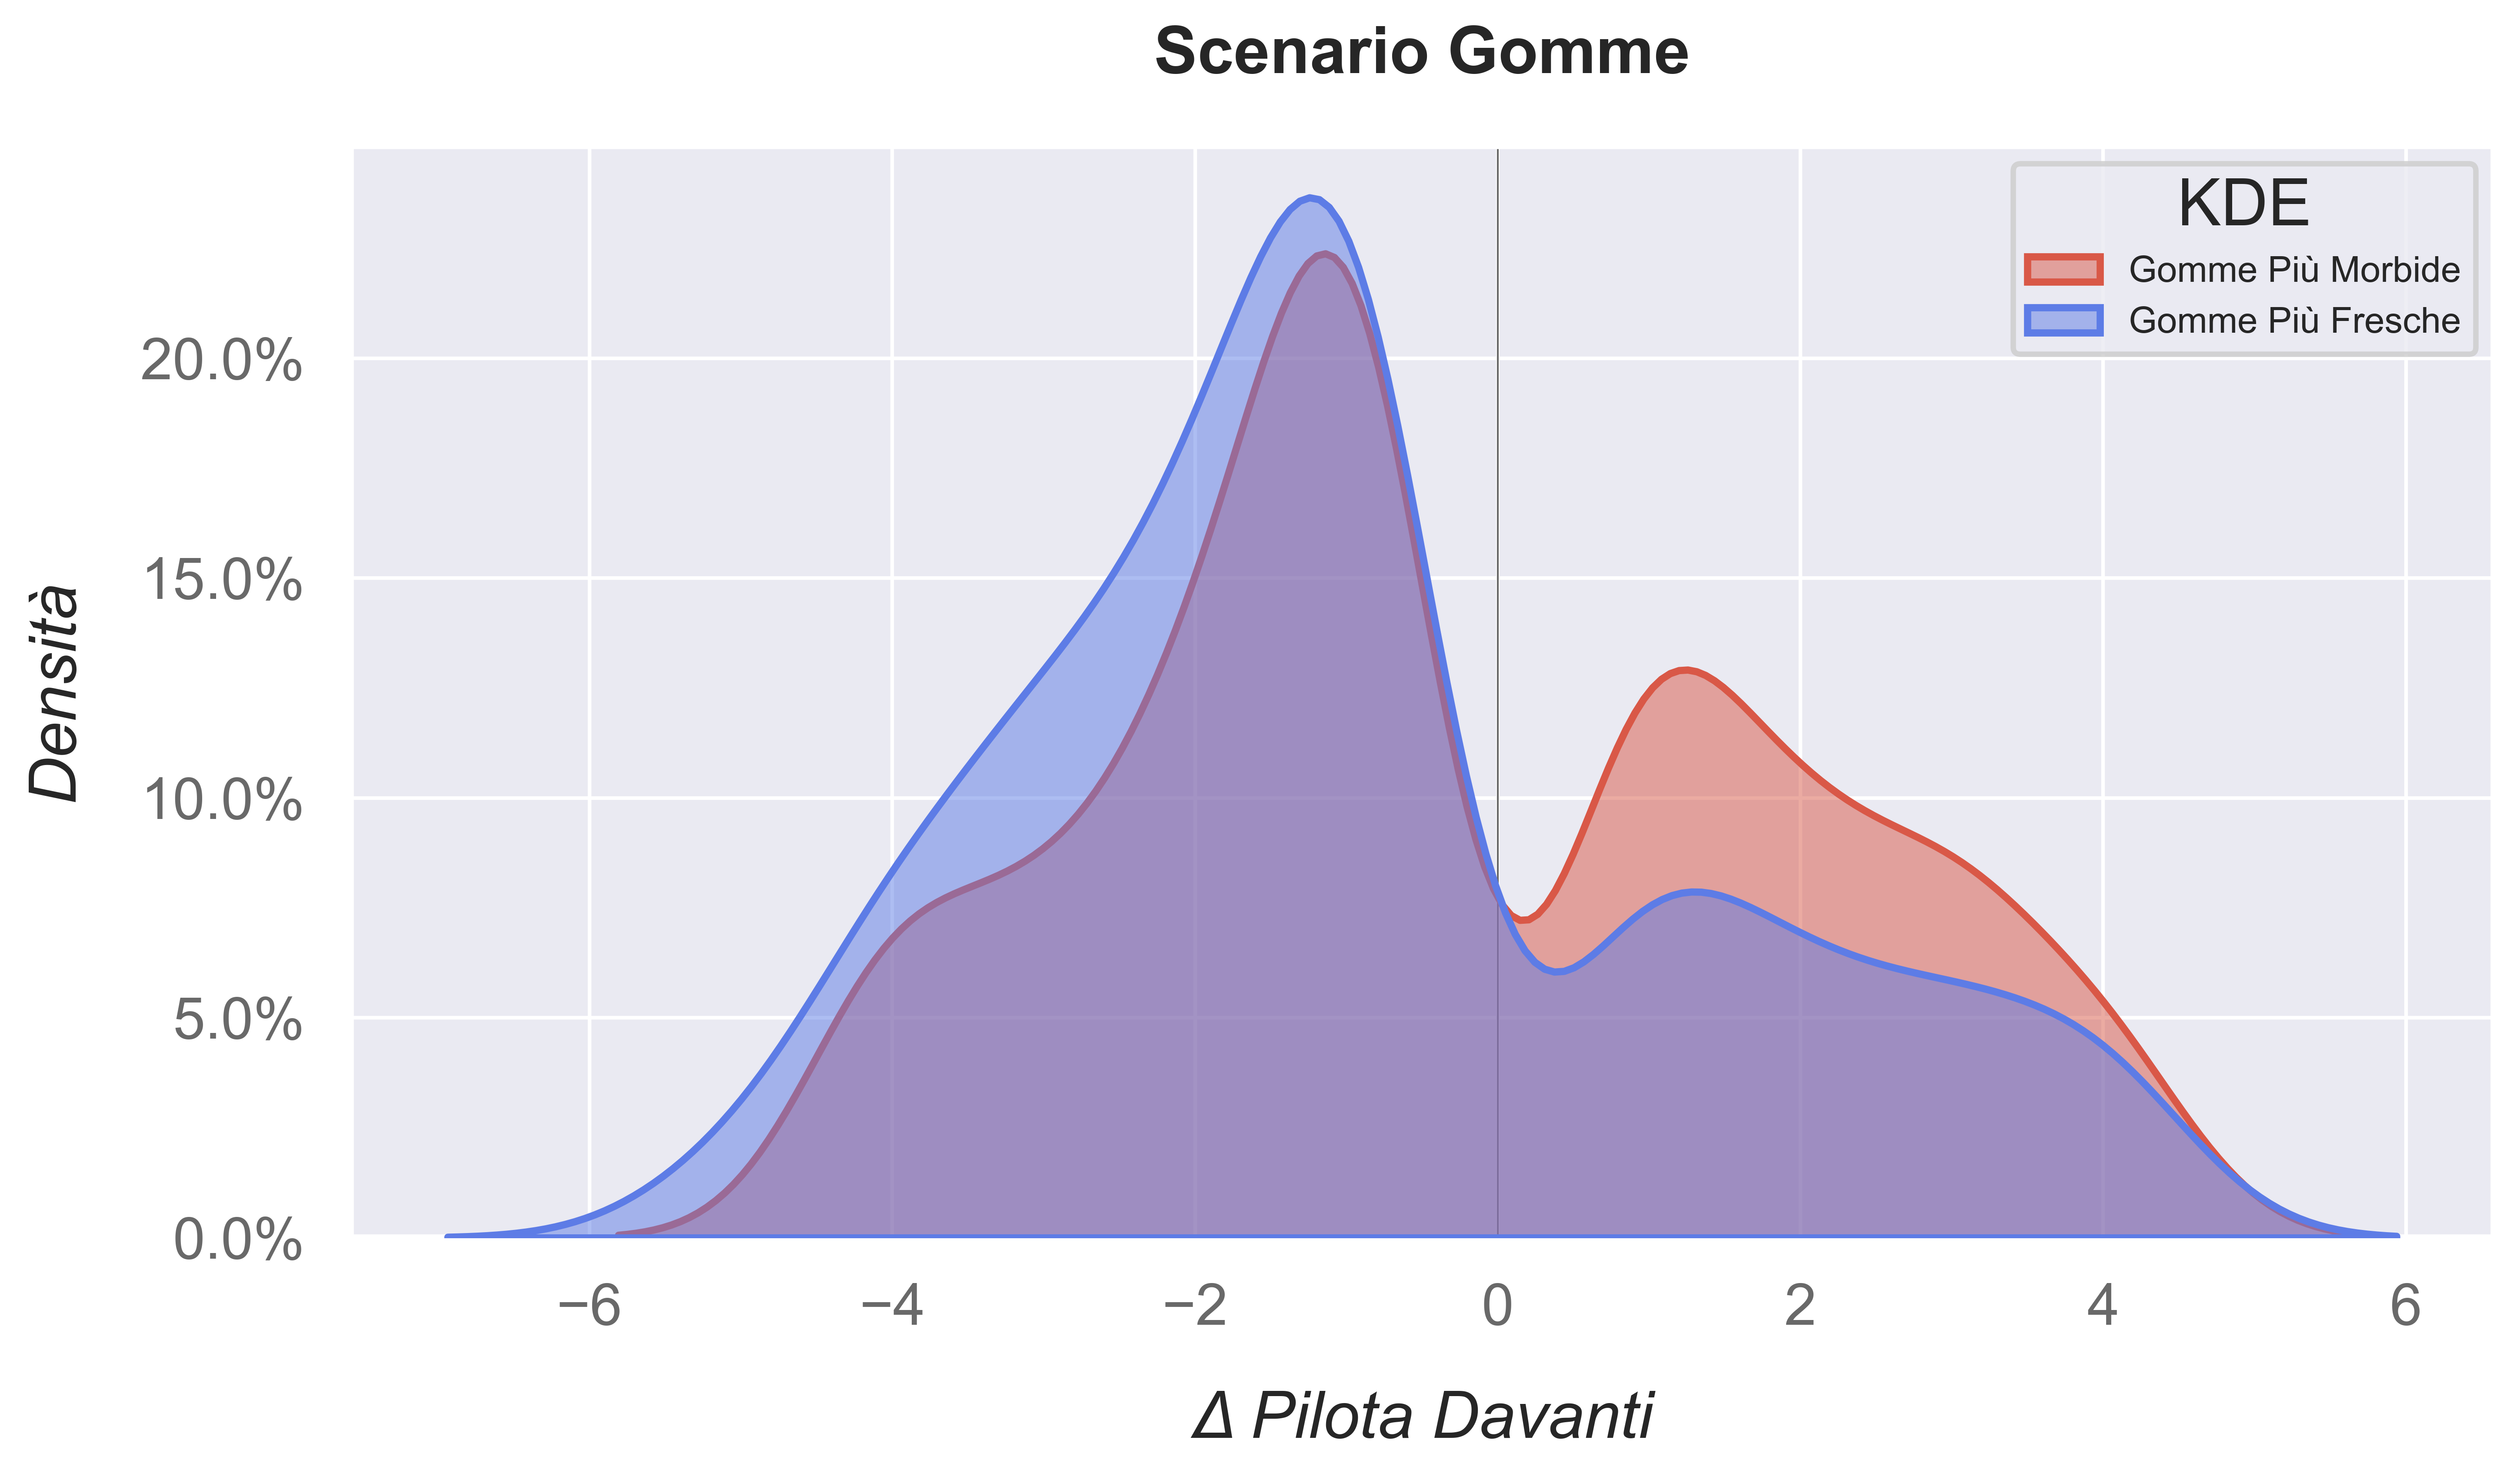

In [15]:
fig, ax = grafico_scenario_gomme(df_partenze.copy(), (10, 6))

*Δ Pilota Davanti*: filtro percentile **10%** - **90%** attivato

### Tabella riassuntiva *scenario*:
<br>
<br>

In [16]:
display(tabella_scenario_gomme(df_partenze.copy()))

Occorrenze  Δ Pilota Davanti μ  Δ Start μ
Scenario                                                    
Gomme Più Fresche         200               -1.00       0.24
Gomme Più Morbide         287               -0.27       0.42

## **Domanda**:

<br>
<br>

### Quali sono i migliori piloti nelle partenze? 

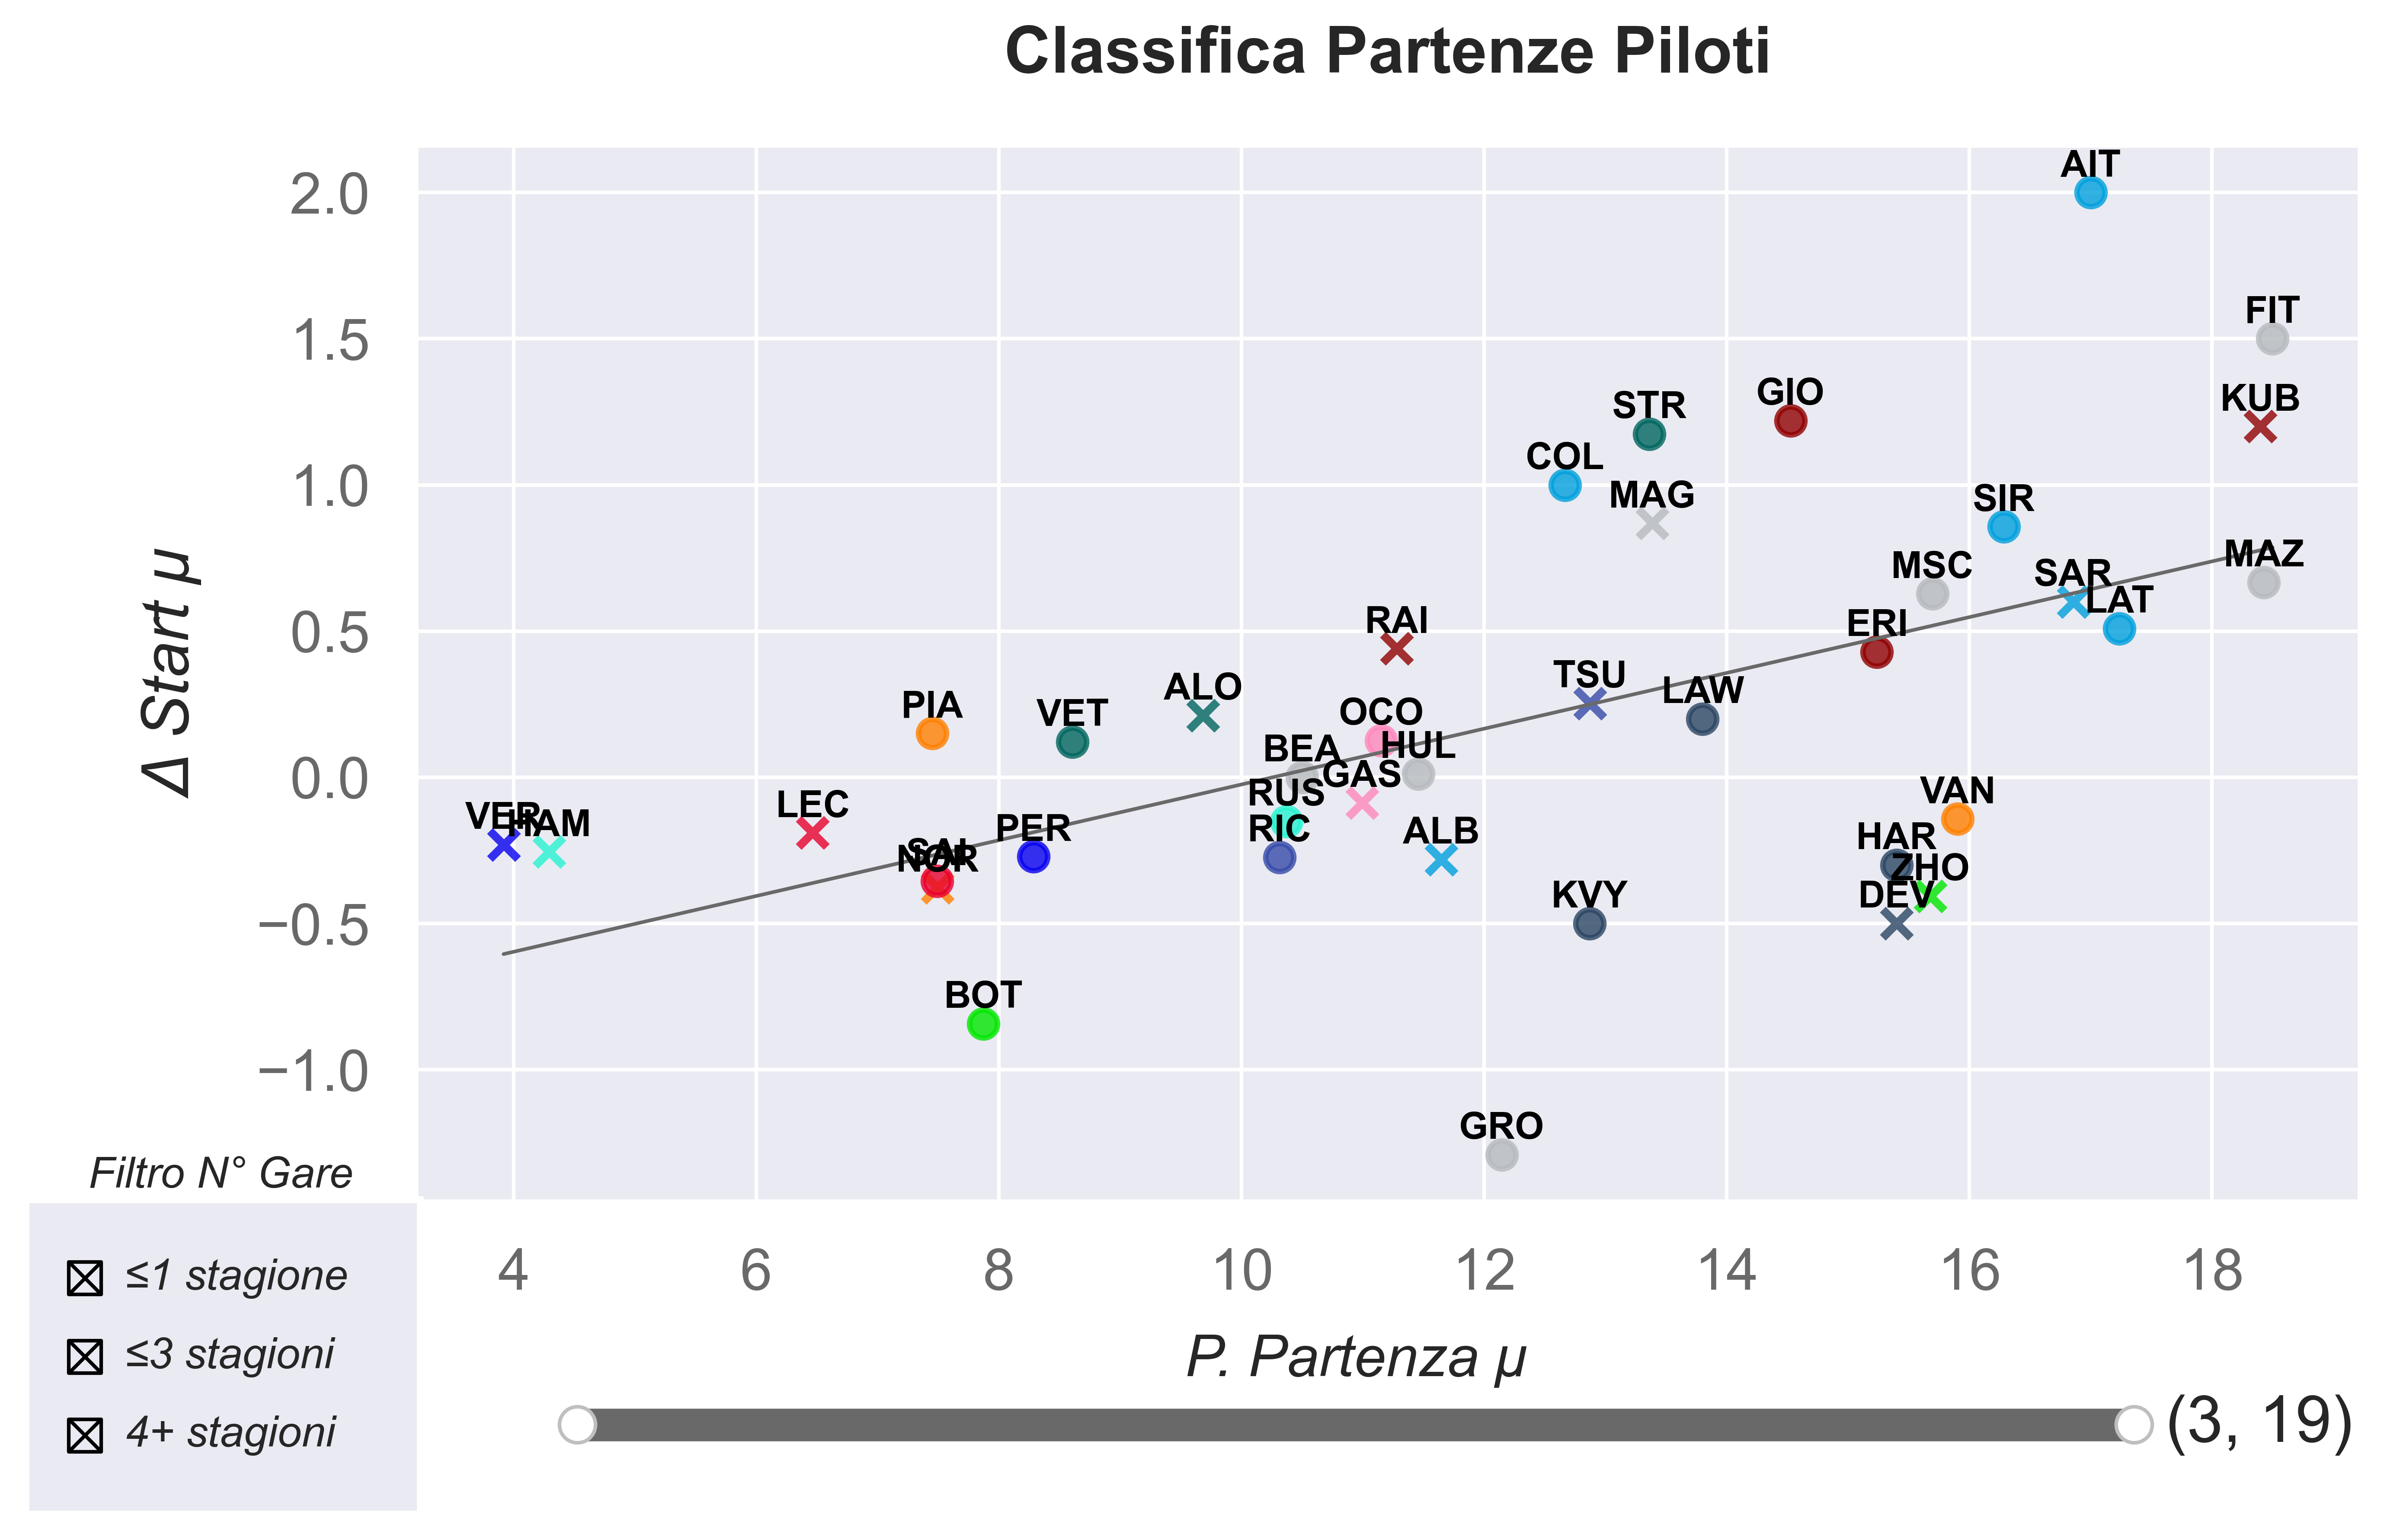

In [17]:
fig, ax = grafico_classifica_partenze(df_partenze.copy(), (10, 6))

## **Domanda**:

<br>
<br>

### Quanto contano davvero le partenze? 

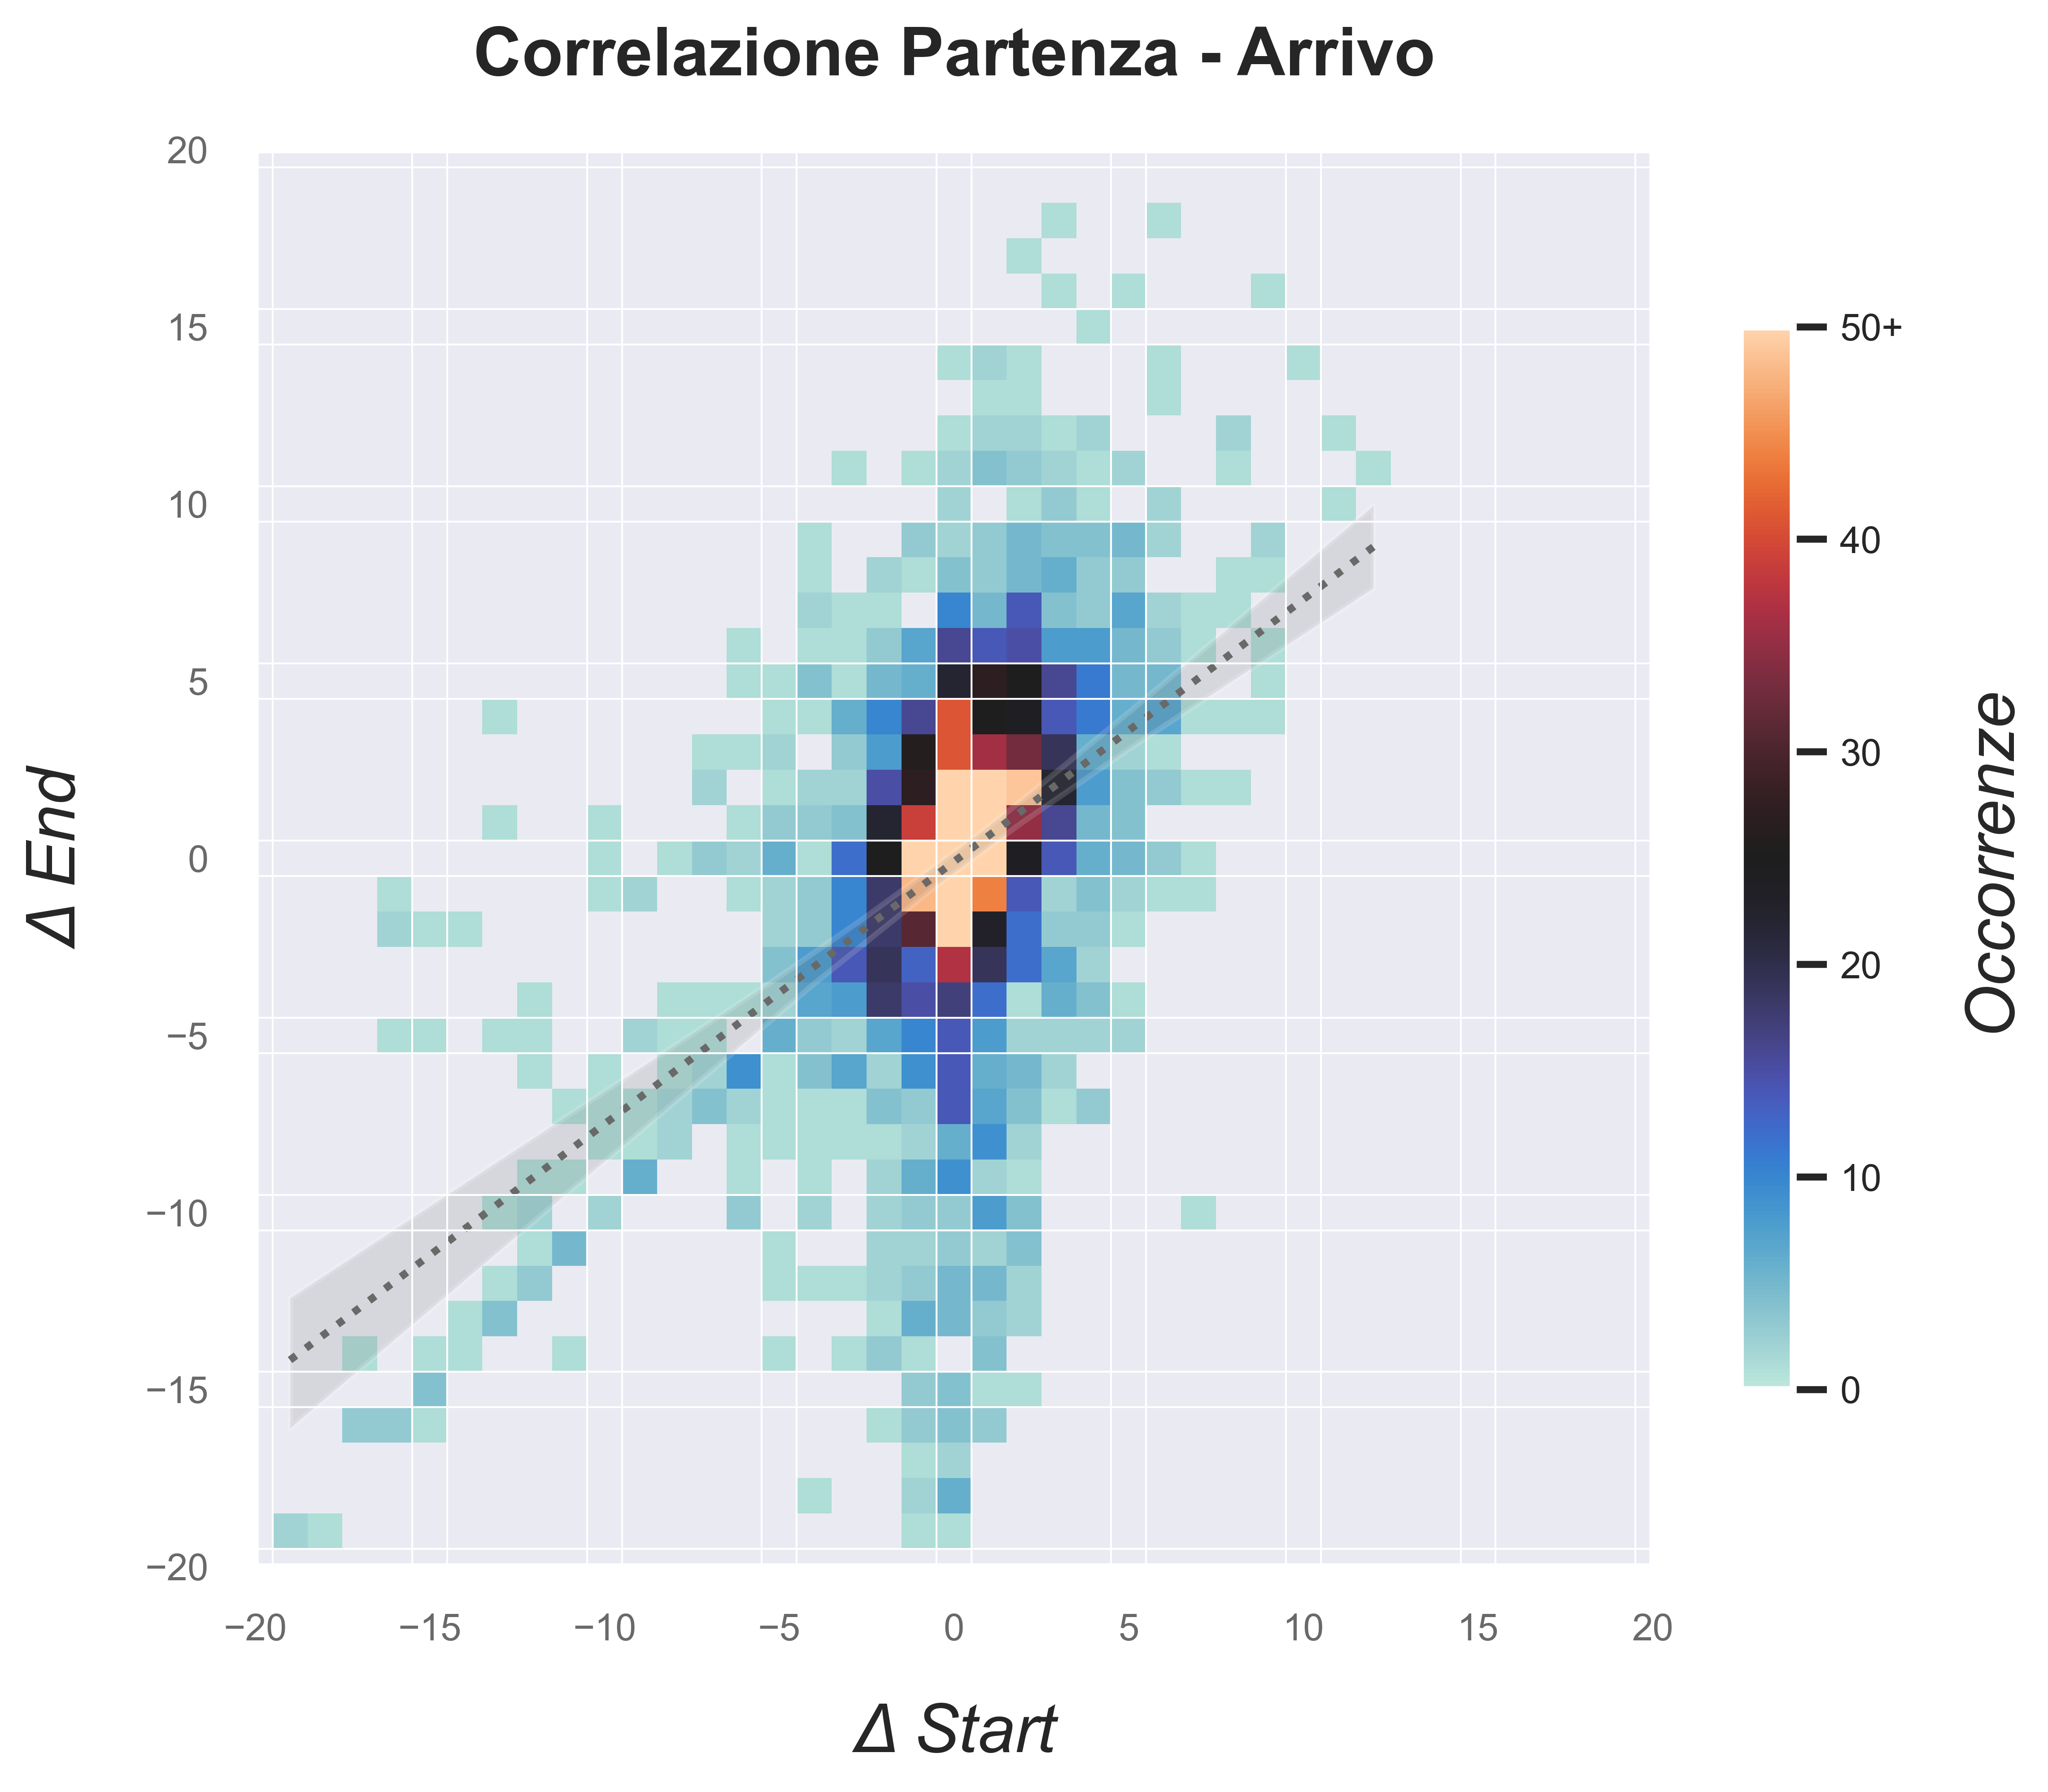

In [18]:
fig, ax = grafico_correlazione_start_end(df_partenze.copy(), (8,7))

### Calcolo della *correlazione* tra *Δ Start* e *Δ End*:

<br>

In [19]:
print(valore_correlazione_start_end(df_partenze.copy()))

Pearson ρ: 0.457
p-value: ~9E-144


# Conclusioni

## Prima Parte

<br>

- Partenze in carriera di *Norris*: &emsp;&emsp; è generalmente un pilota **conservativo**, che cerca di ridurre i rischi di partire nel *"midfield"*. Ha prestazioni **simili** rispetto ai **compagni** di squadra, ad eccezione di **2021** e **2024**, i suoi due anni peggiori.

- Partenze negative nel 2024: &emsp;&emsp; la **competitività** dell'auto gli ha permesso di partire molto più avanti rispetto agli anni precedenti; tuttavia, ciò richiede un cambiamento nell'**approccio** e nelle strategie di **difesa/attacco** in partenza, con un **riadattamento** necessario da parte del pilota.

## Seconda Parte

<br>

- Posizione dopo la partenza: &emsp;&emsp; consultazione dell'**heatmap** in base alla posizione di partenza.

- Scenario gomme: &emsp;&emsp; sono preferibili le gomme più **morbide**, anche se probabilmente non è conveniente nell'**economia di gara**.

- I migliori piloti nelle partenze: &emsp;&emsp; ***VER***, ***HAM***, ***LEC***, ***VET***, ***ALO*** (almeno tra coloro che partono più **avanti**).

- Quanto contano le partenze: &emsp;&emsp; il coefficiente di Pearson calcolato indica **correlazione moderata e positiva**. Ciò suggerisce che le partenze hanno una certa importanza, ma **non sono il fattore determinante** o dominante nel risultato complessivo ([esempi FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/index.html)).